In [3]:

import numpy as np 
import pandas as pd 

In [4]:
df1=pd.read_csv("Visualization_CV.csv")

In [5]:
df1.head()

,Unnamed: 0,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
3,3,Taiwan,Taiwan,1/21/2020,1.0,0.0,0.0,0.0
4,4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0


In [6]:
import matplotlib.pyplot as plt

In [7]:
mainland_china_data=df1.loc[df1["Country"]=="Mainland China"]
mainland_china_data.head()

,Unnamed: 0,Province/State,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,0,Shanghai,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,1,Yunnan,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,2,Beijing,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
4,4,Jilin,Mainland China,1/21/2020,0.0,1.0,0.0,0.0
5,5,Sichuan,Mainland China,1/21/2020,2.0,1.0,0.0,0.0


In [8]:
mainland_china_data["Province/State"].nunique()

31

In [9]:
mainland_china_data.shape

(262, 8)

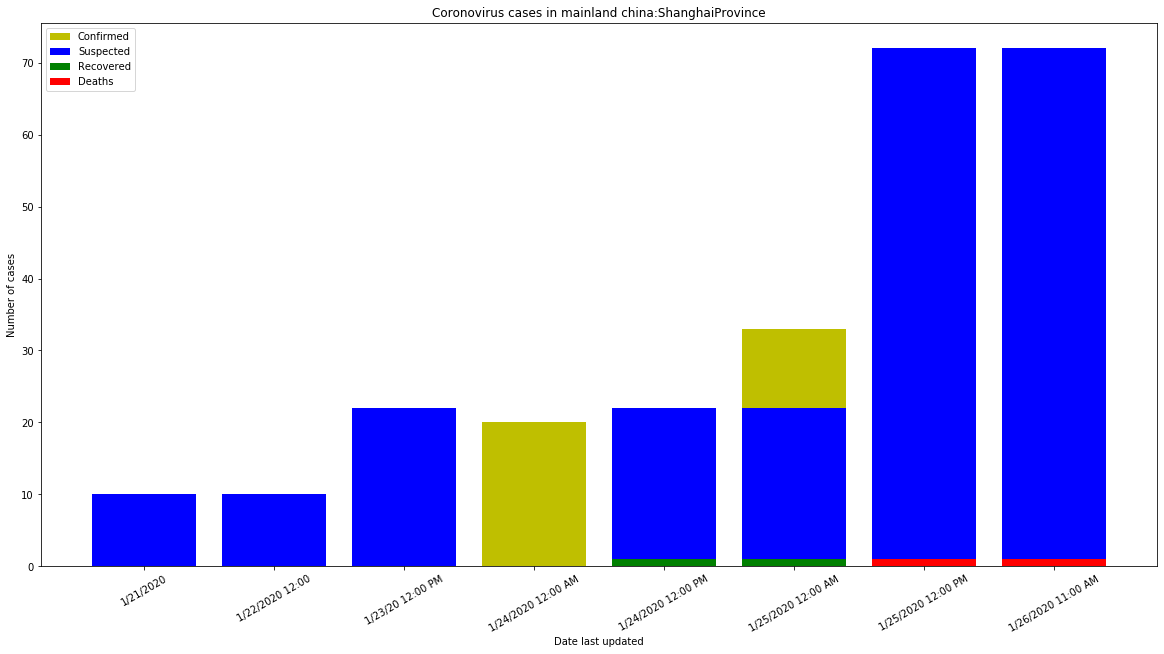

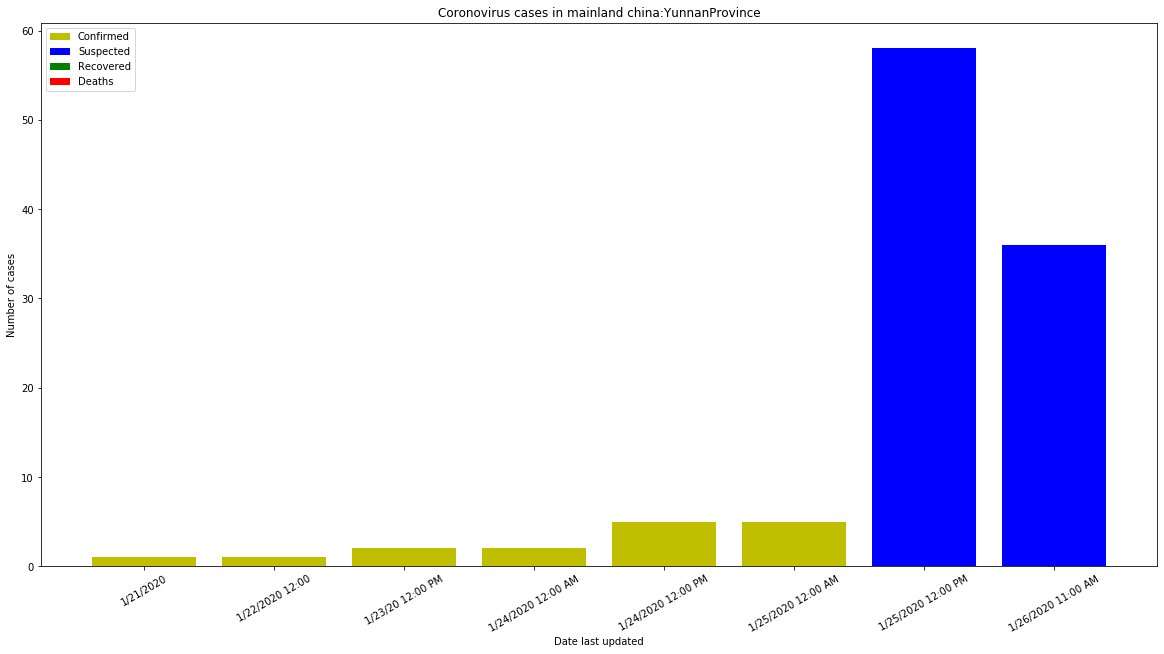

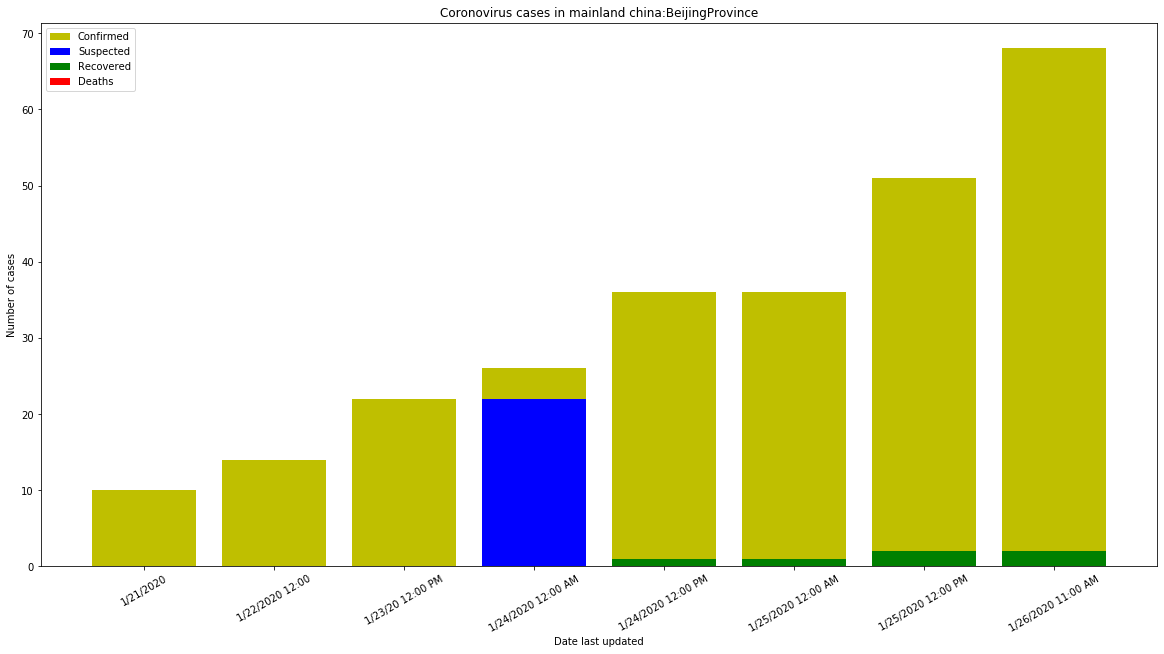

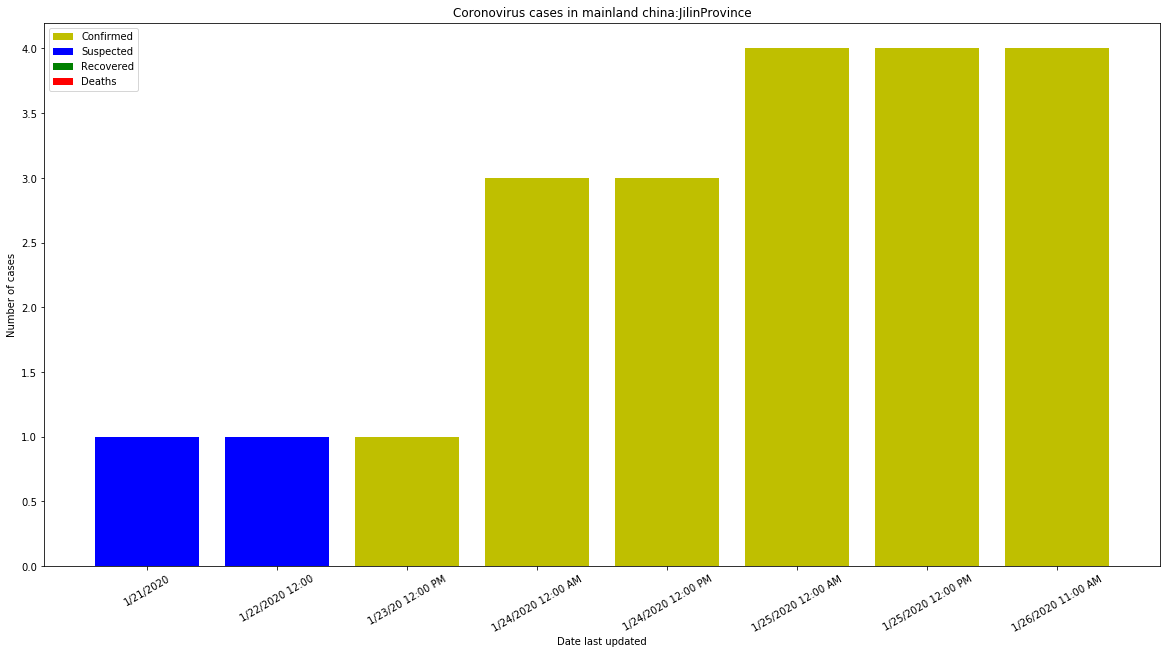

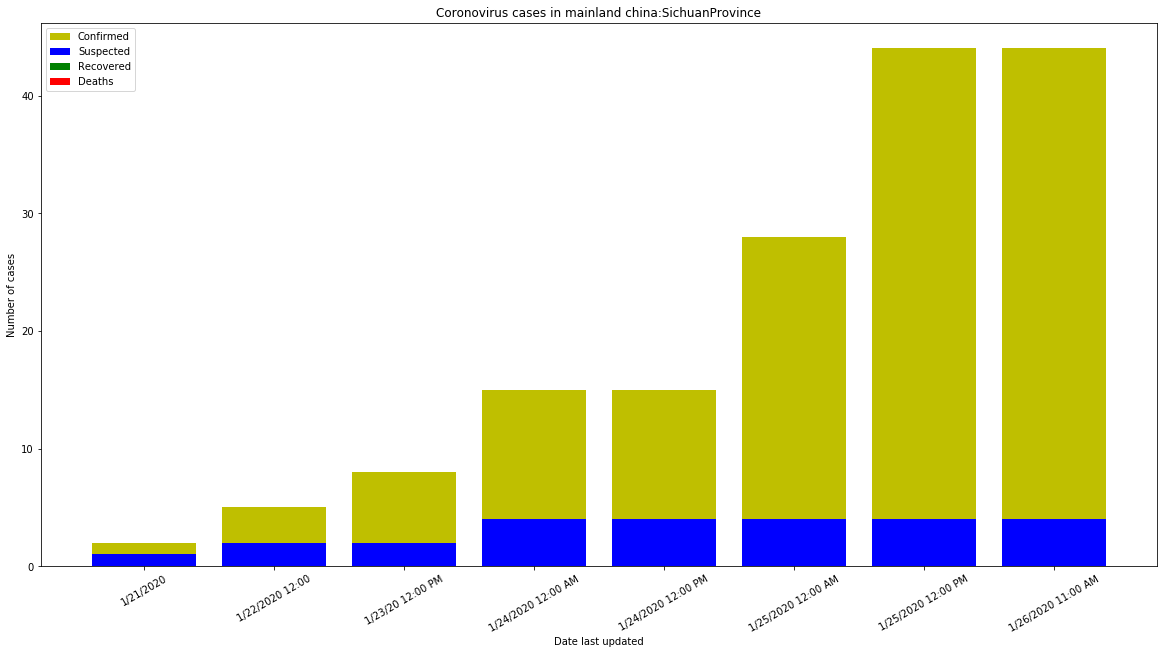

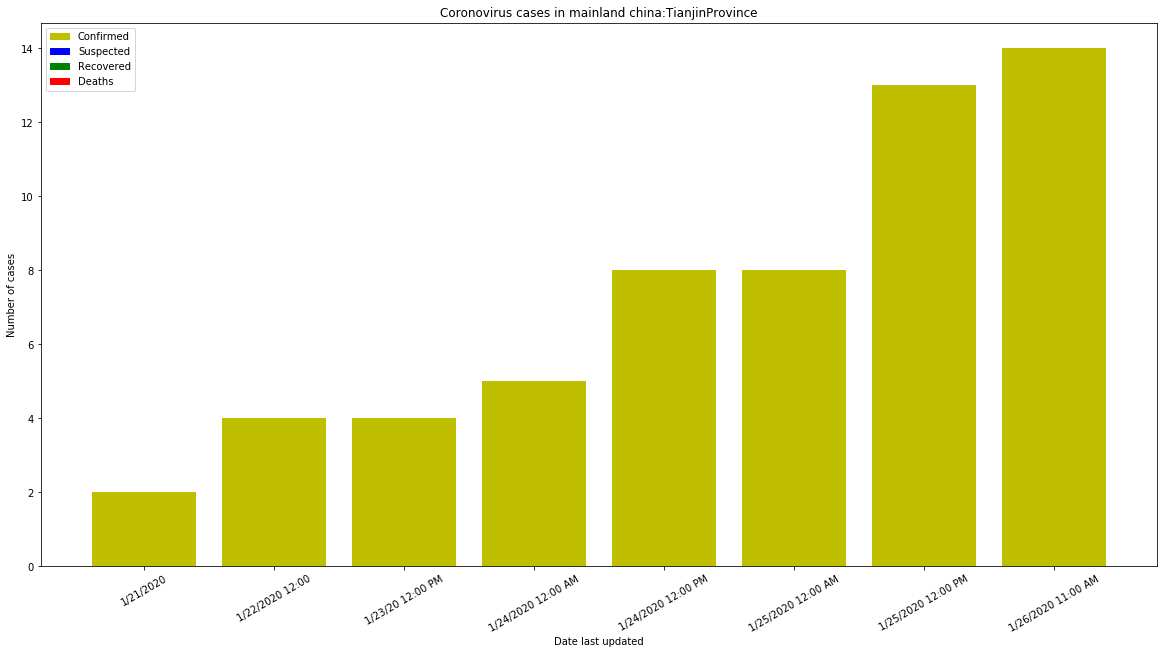

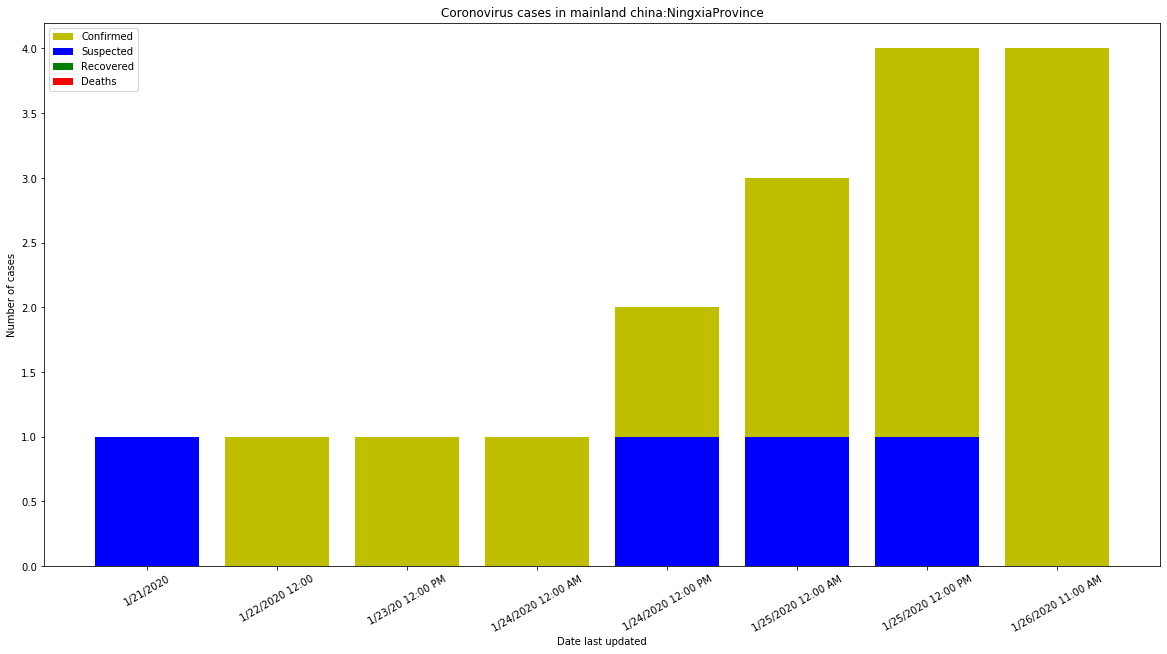

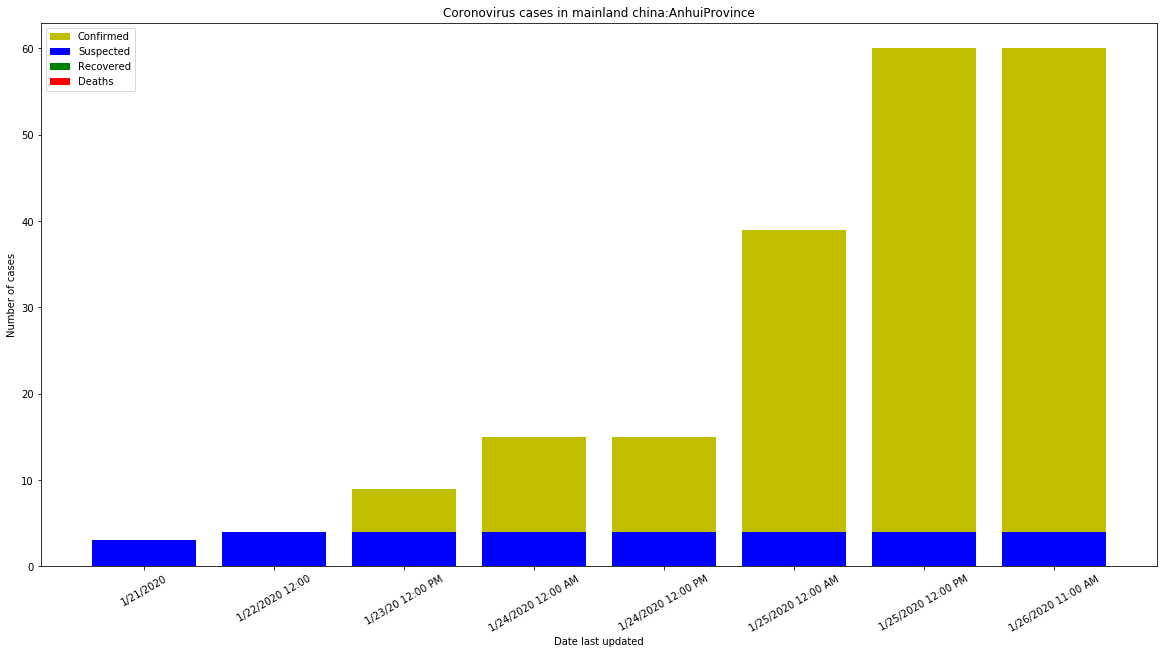

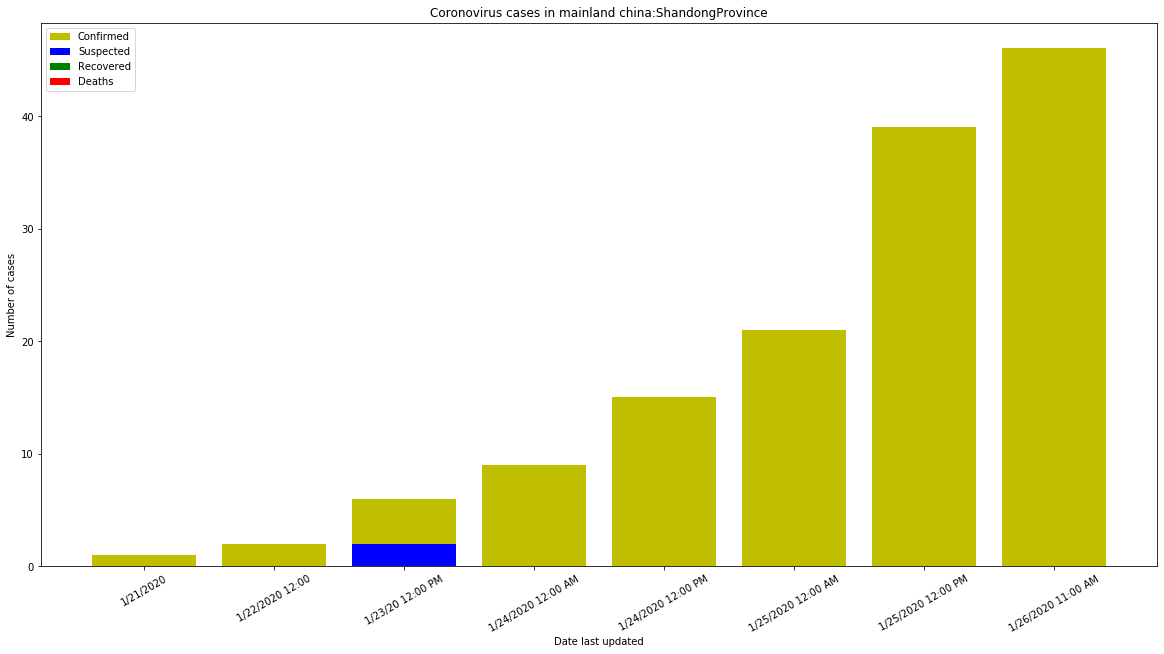

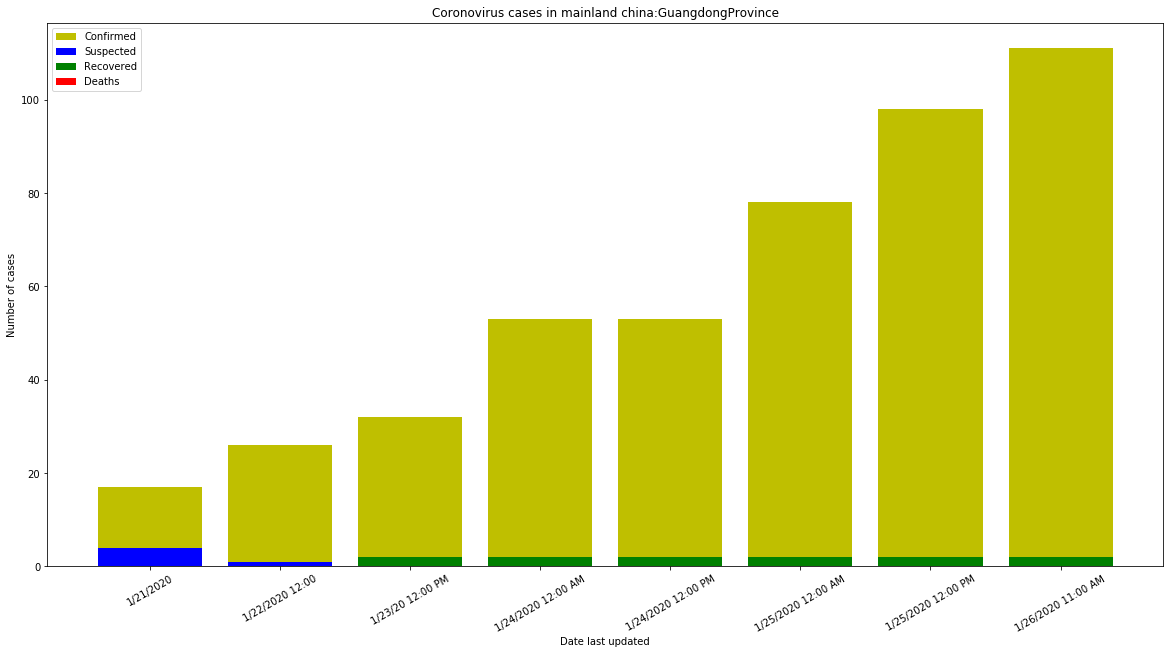

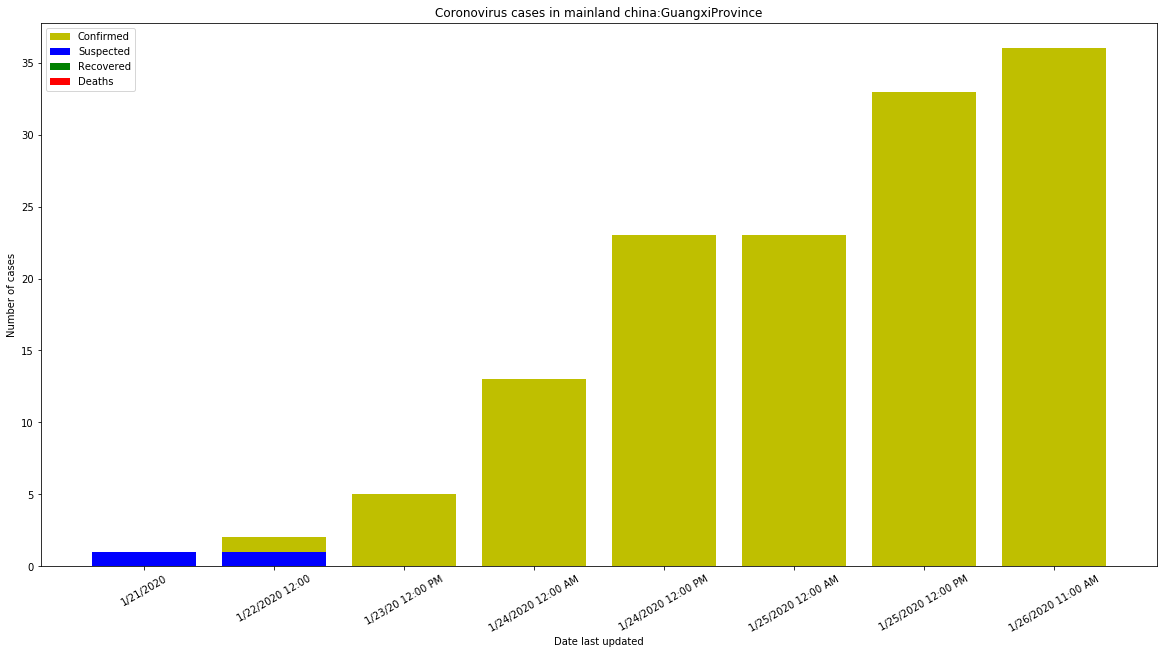

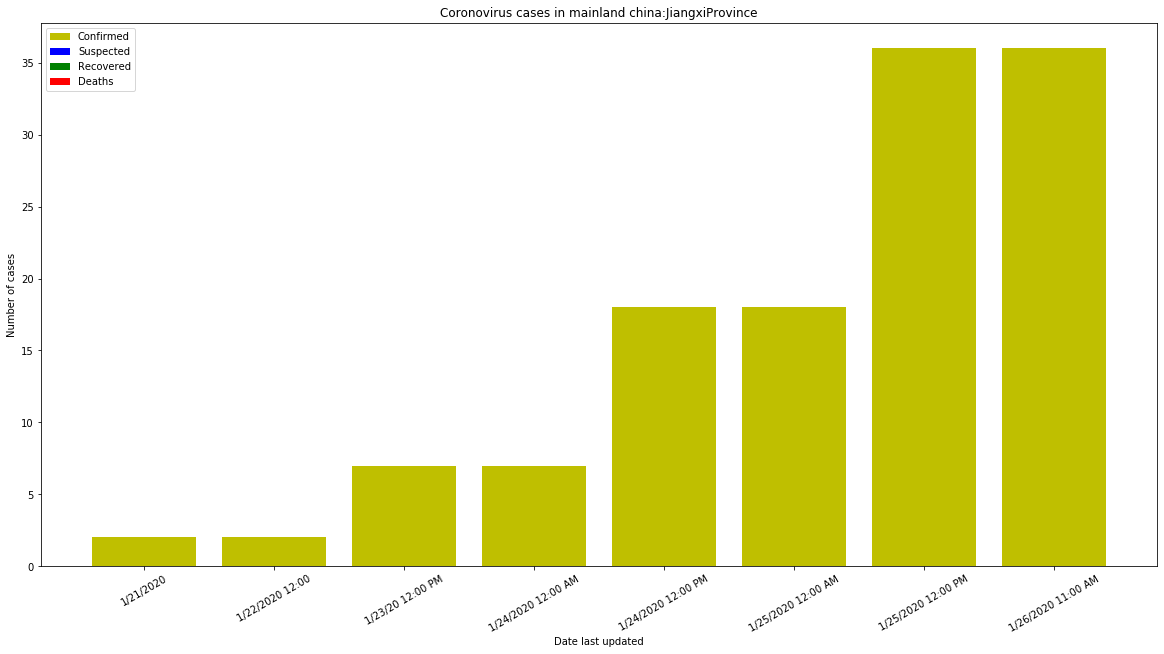

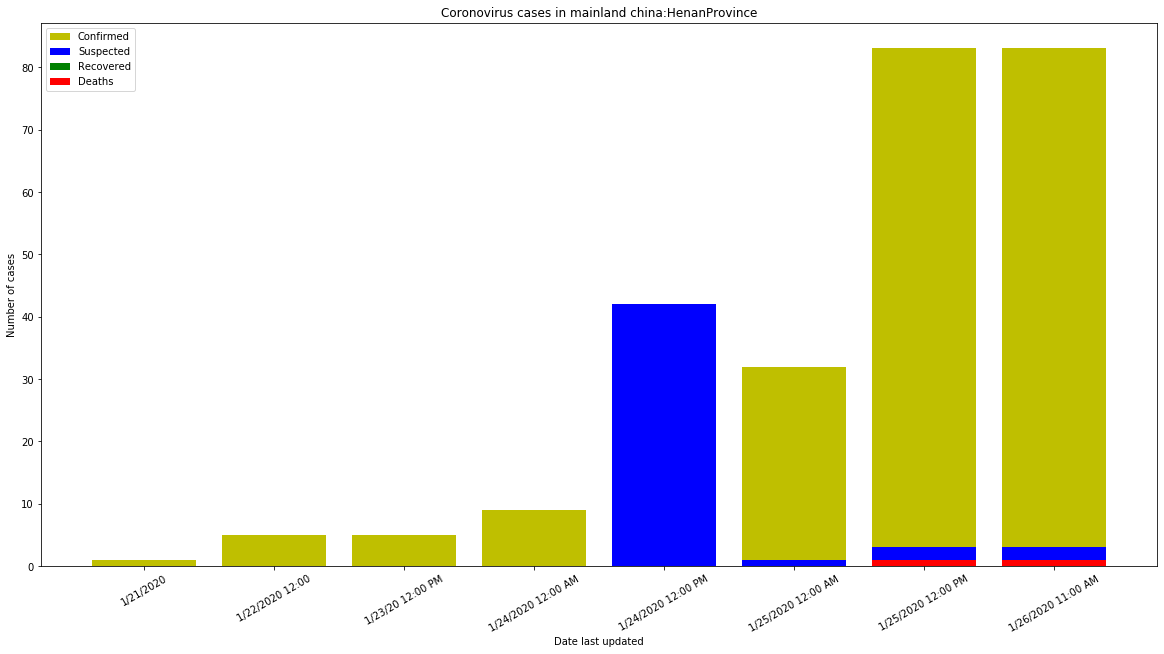

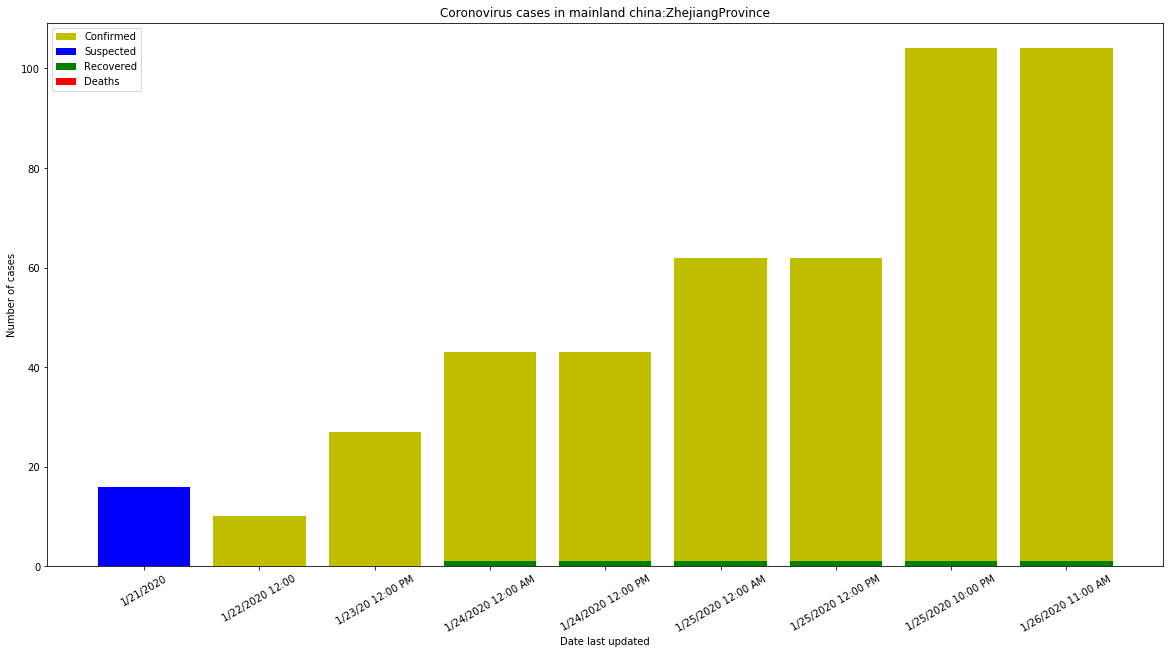

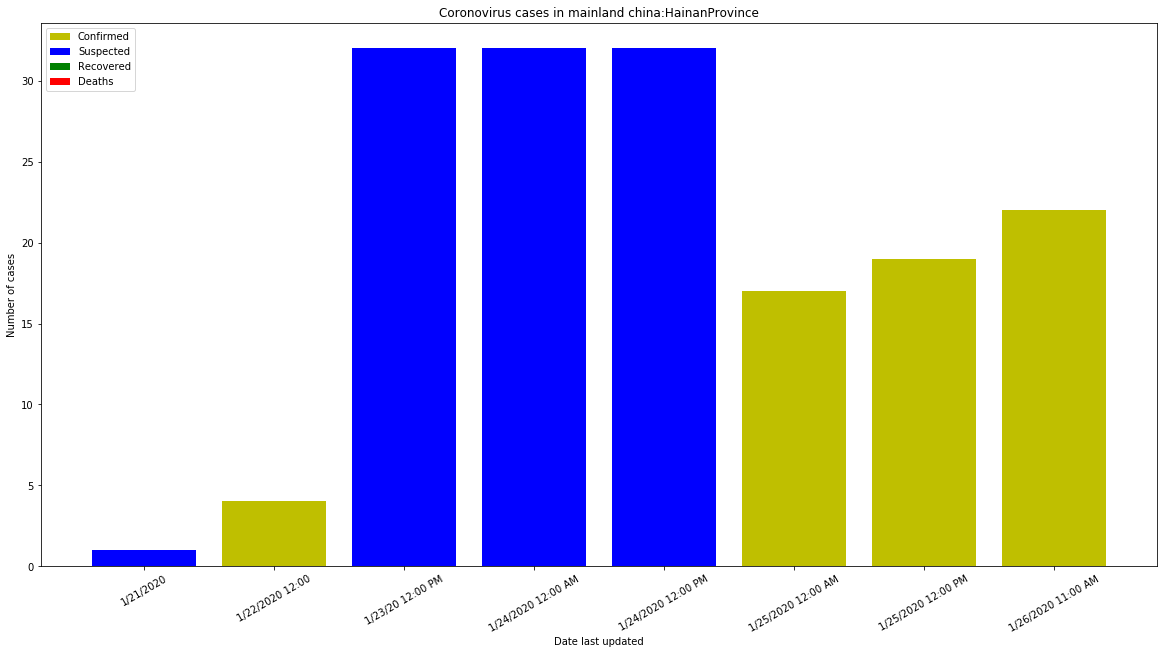

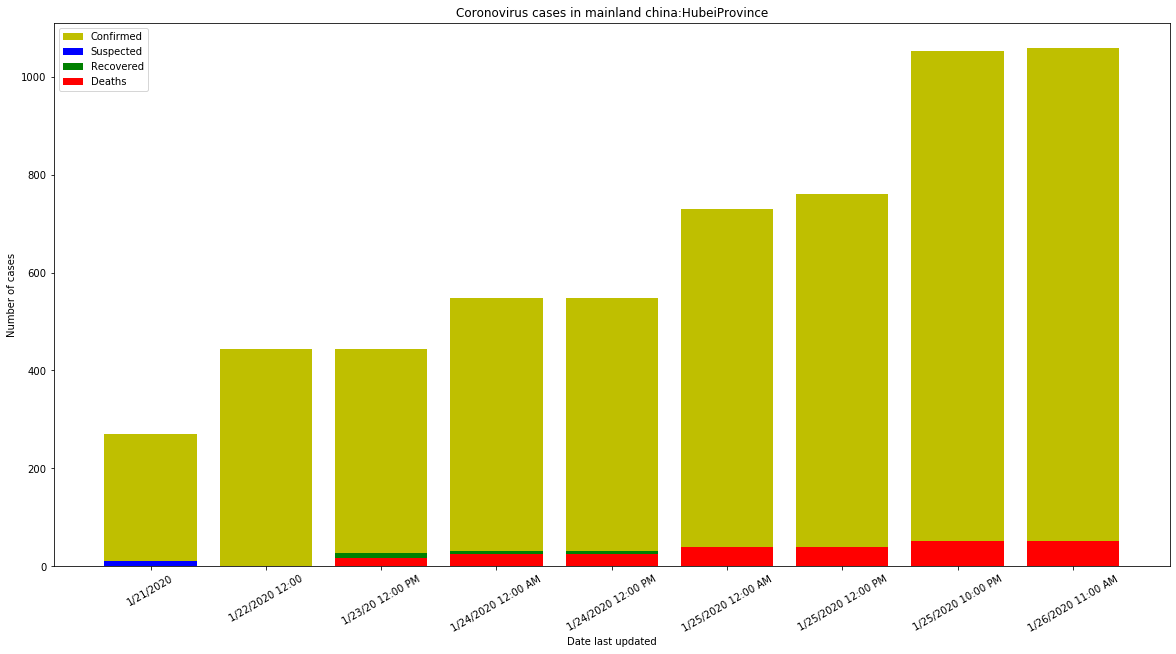

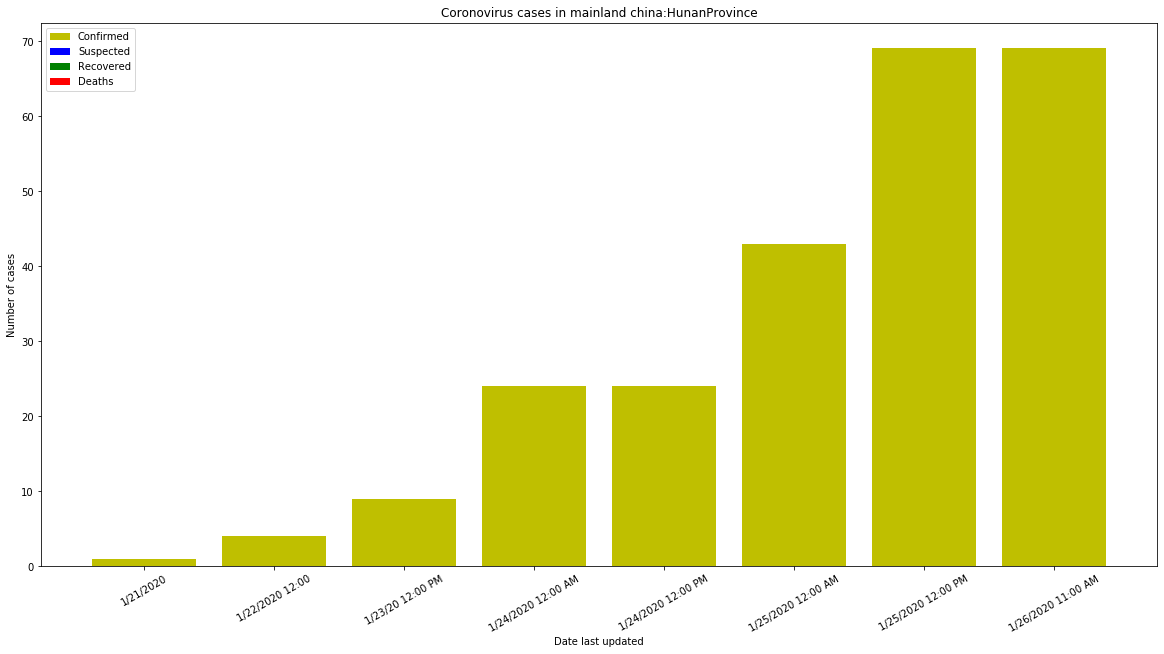

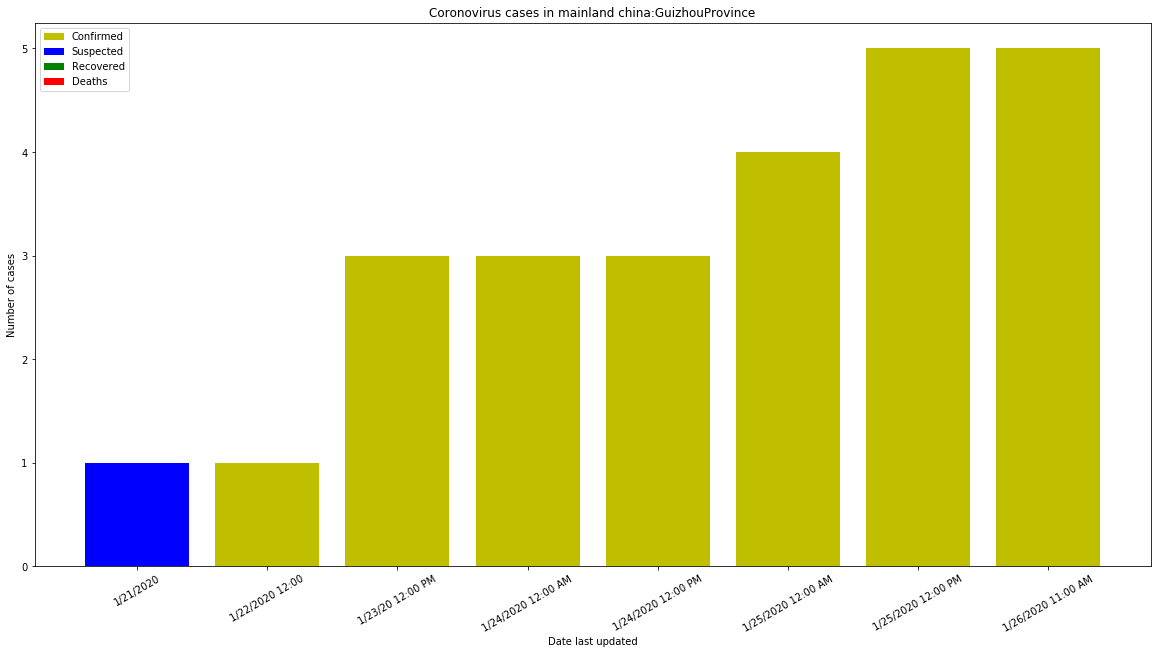

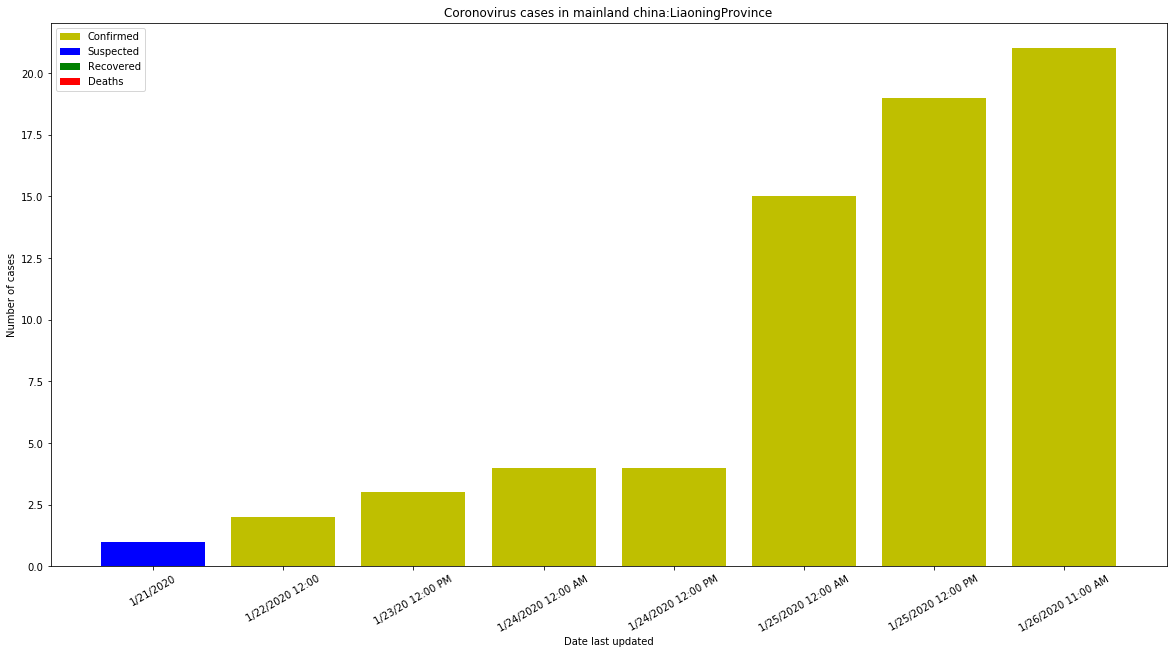

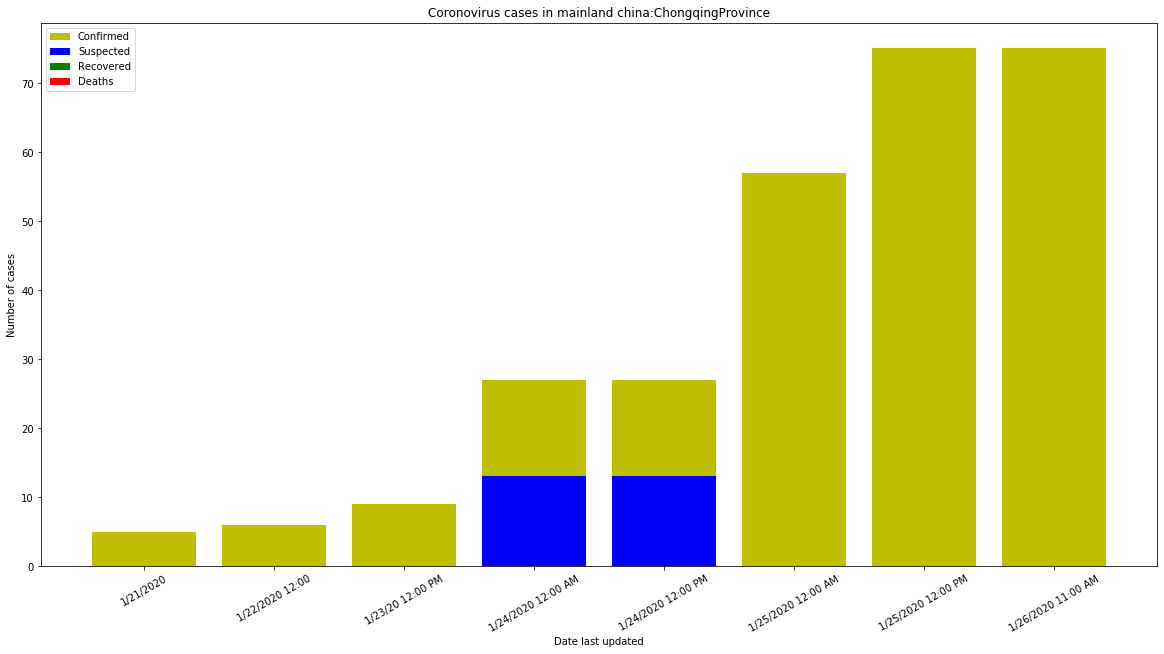

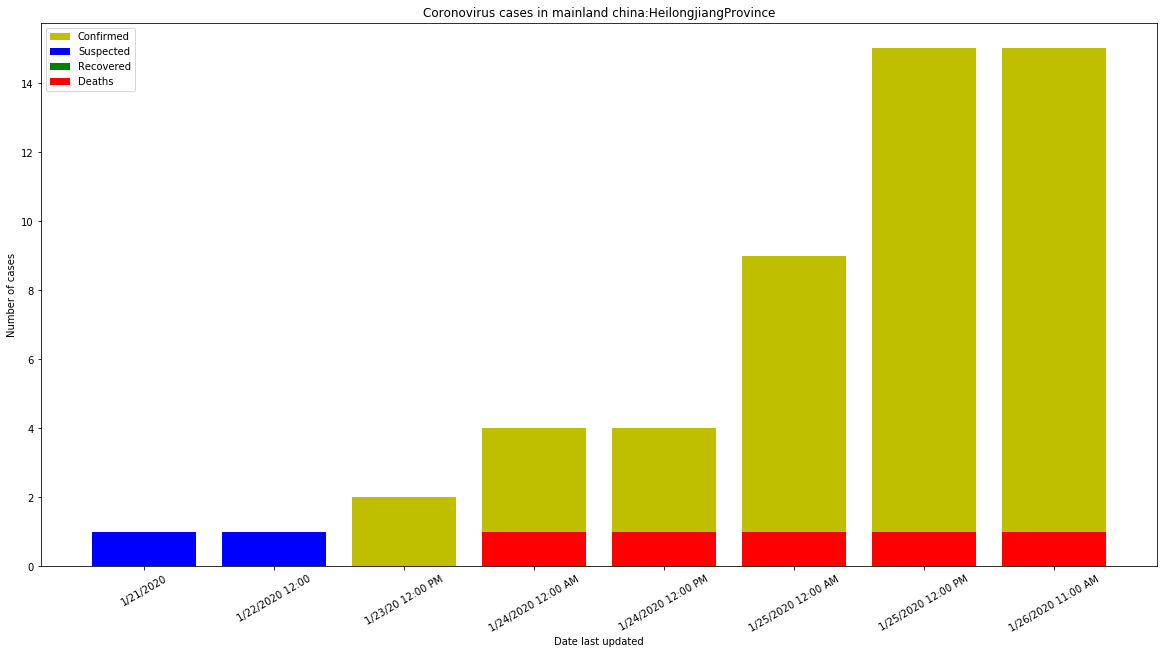

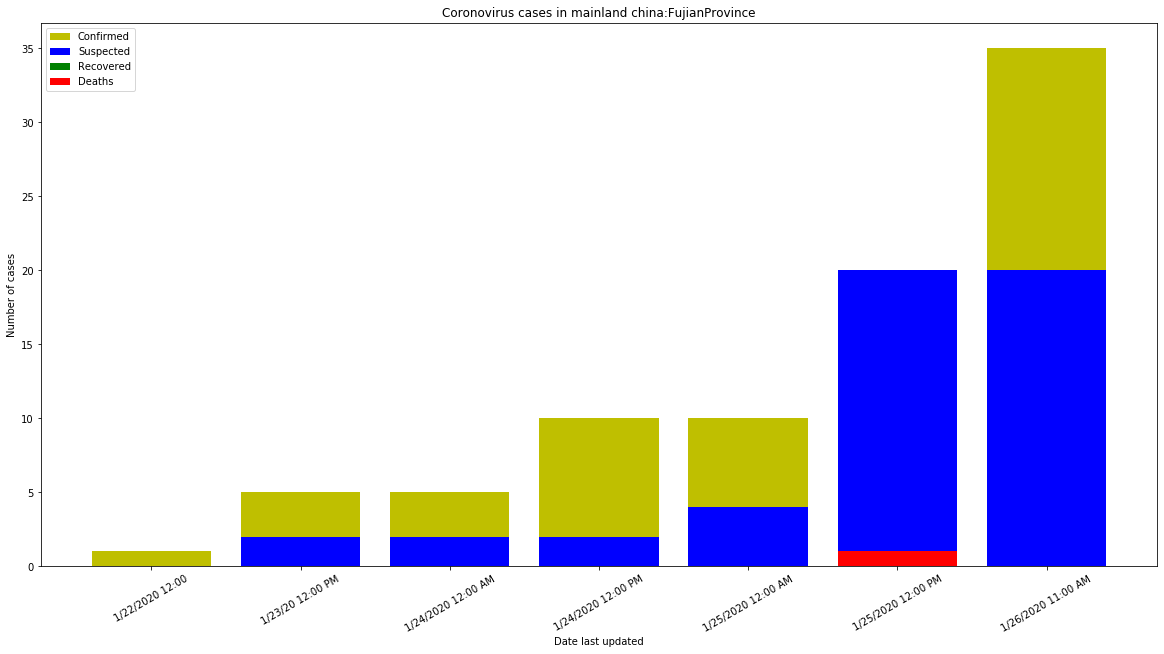

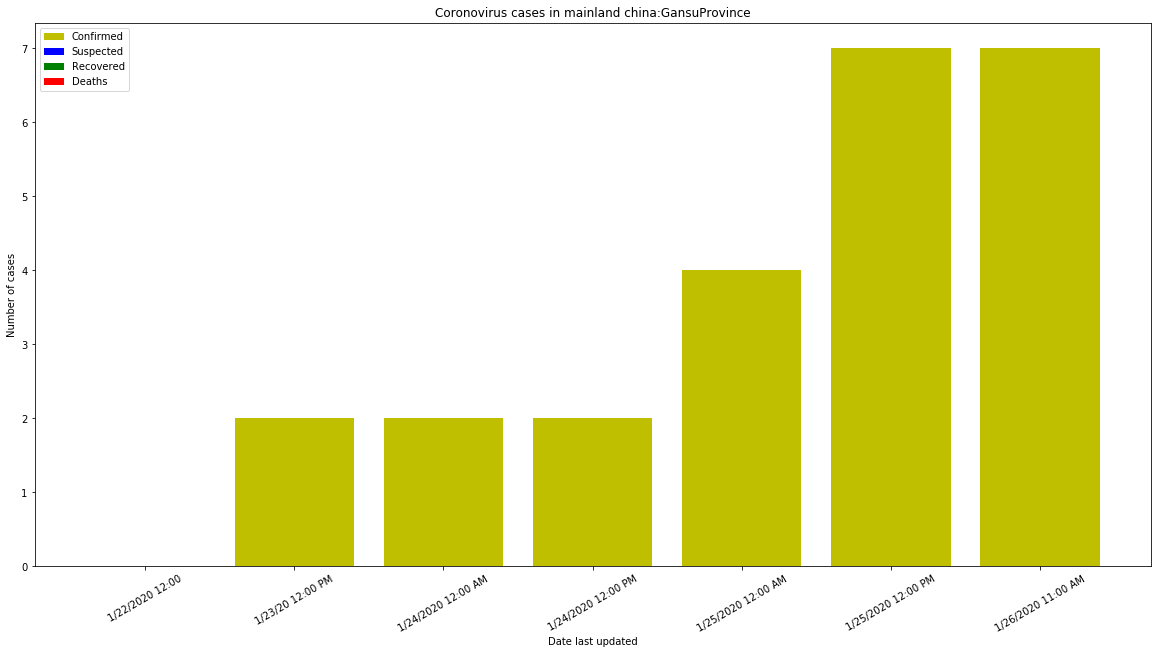

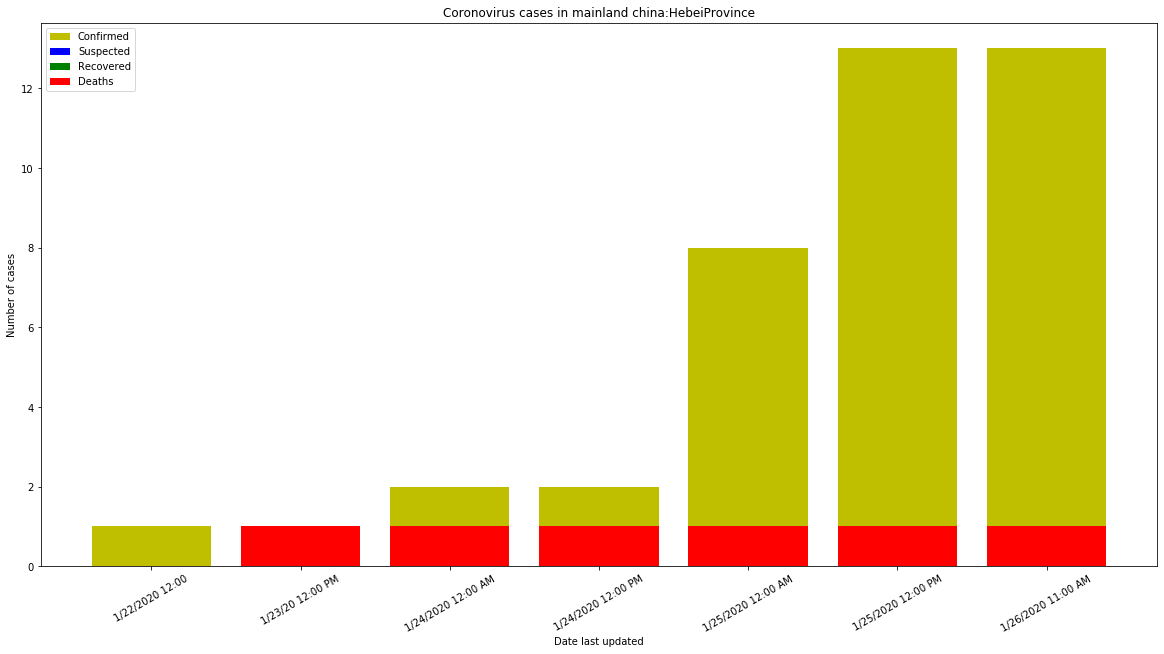

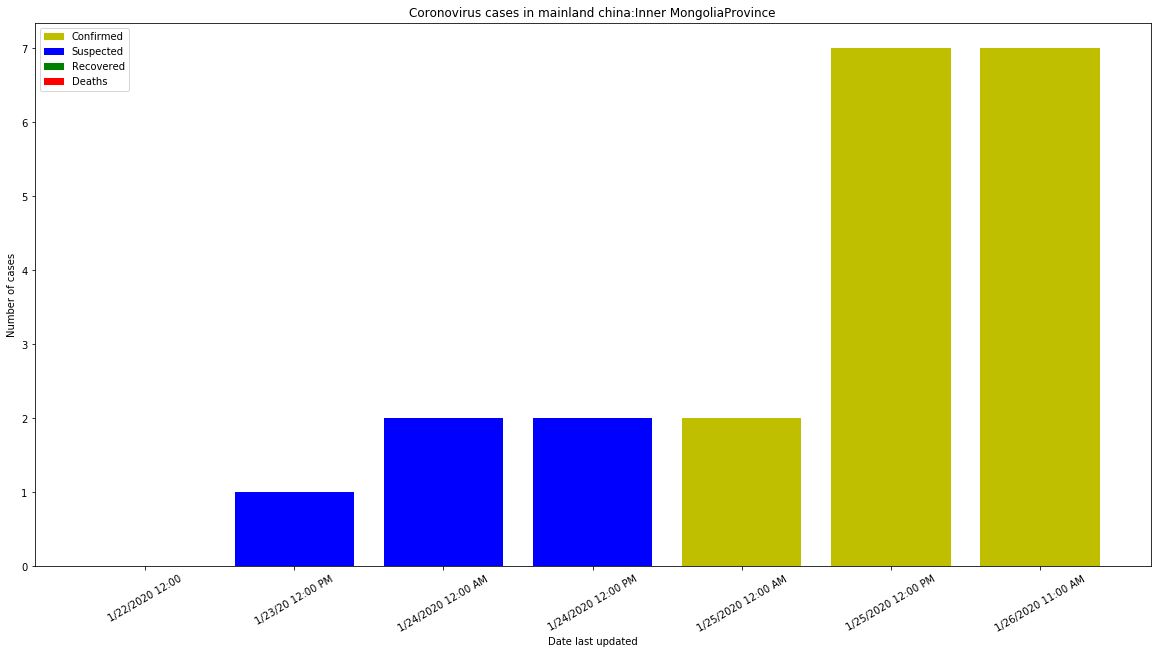

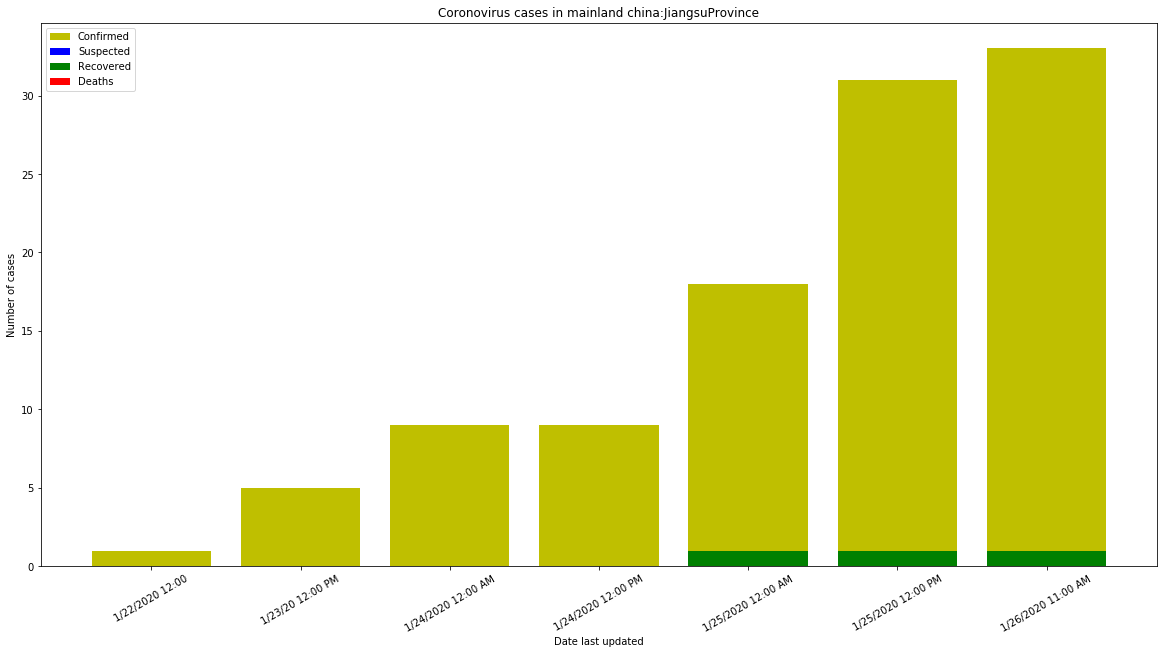

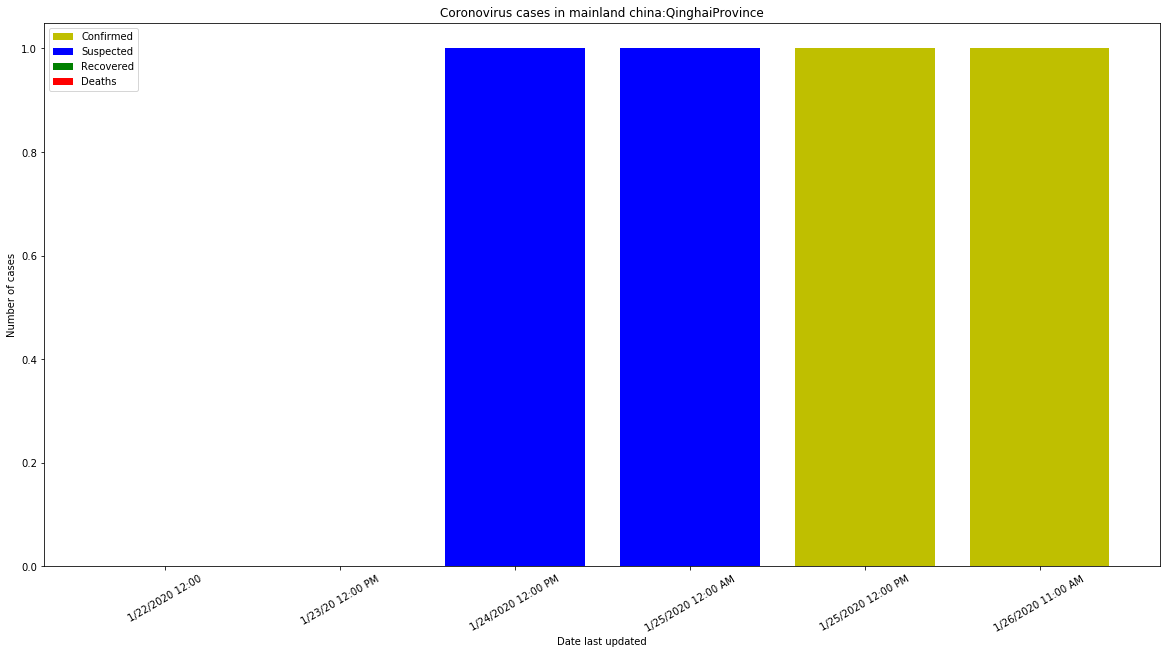

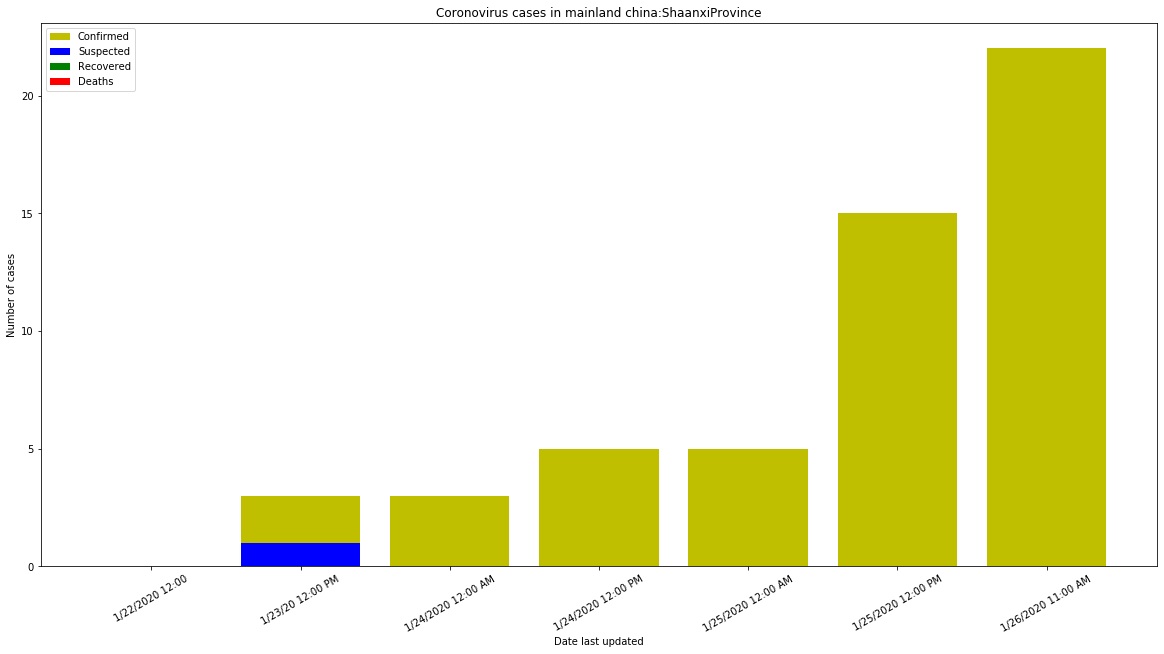

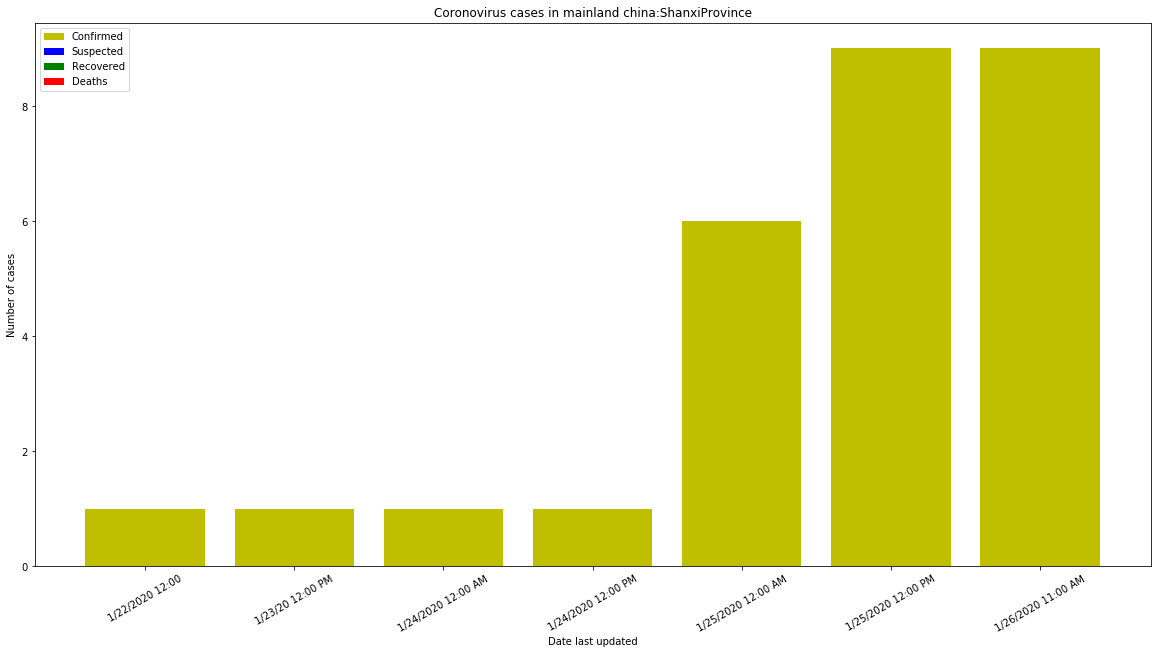

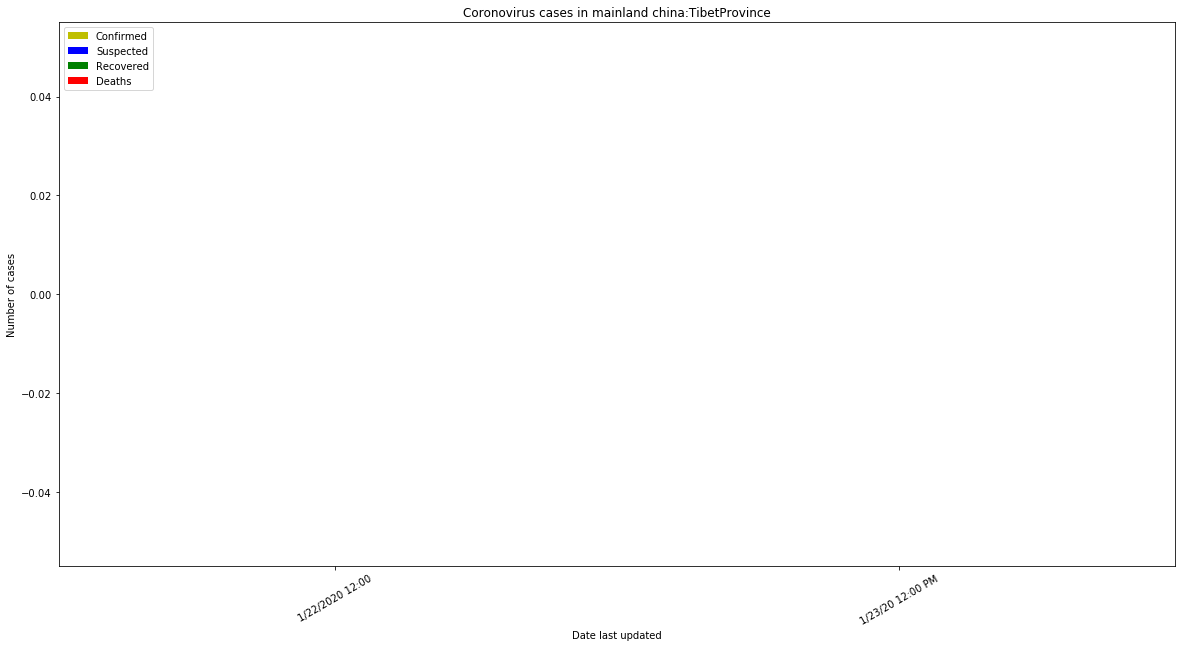

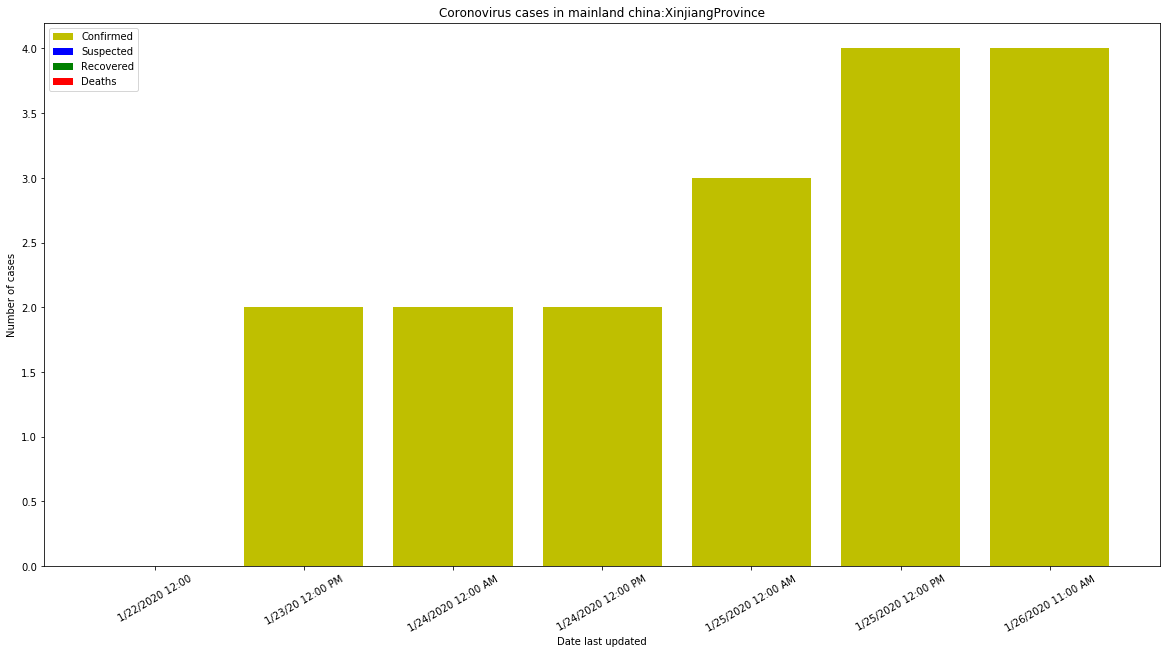

In [10]:
for x in mainland_china_data["Province/State"].unique():
    temp_df=df1.loc[df1["Province/State"]==x]
    fig, ax = plt.subplots(figsize=(20,10))
    plt.bar(temp_df["Date last updated"],temp_df["Confirmed"],color='y')
    plt.bar(temp_df["Date last updated"],temp_df["Suspected"],color='b')
    plt.bar(temp_df["Date last updated"],temp_df["Recovered"],color='g')
    plt.bar(temp_df["Date last updated"],temp_df["Deaths"],color='r')
    plt.legend(["Confirmed","Suspected","Recovered", "Deaths"], loc="upper left")
    plt.xticks(fontsize=10, rotation=30)
    plt.xlabel("Date last updated")
    plt.ylabel("Number of cases")
    plt.title("Coronovirus cases in mainland china:"+x+"Province")
#     temp_df.pivot("Date last updated","")
    plt.show()

In [11]:
df1["Country"].unique()


array(['Mainland China', 'Taiwan', 'Hong Kong', 'Japan', 'Thailand',
       'South Korea', 'United States', 'Macau', 'Singapore',
       'Philippines', 'Malaysia', 'Vietnam', 'Australia', 'Mexico',
       'Brazil', 'Colombia', 'France', 'Nepal', 'Canada'], dtype=object)

In [12]:
df1.columns


Index(['Unnamed: 0', 'Province/State', 'Country', 'Date last updated',
       'Confirmed', 'Suspected', 'Recovered', 'Deaths'],
      dtype='object')

In [13]:
df2=df1.drop(columns=["Unnamed: 0","Province/State"])
df2.head()

,Country,Date last updated,Confirmed,Suspected,Recovered,Deaths
0,Mainland China,1/21/2020,9.0,10.0,0.0,0.0
1,Mainland China,1/21/2020,1.0,0.0,0.0,0.0
2,Mainland China,1/21/2020,10.0,0.0,0.0,0.0
3,Taiwan,1/21/2020,1.0,0.0,0.0,0.0
4,Mainland China,1/21/2020,0.0,1.0,0.0,0.0


In [18]:
countrywisecases=df2.groupby(["Country","Date last updated"])["Confirmed","Suspected","Recovered","Deaths"].sum()

c:\users\mmakwana\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [19]:
countrywisecases.head()

Confirmed  Suspected  Recovered  Deaths
Country   Date last updated                                          
Australia 1/23/20 12:00 PM          0.0        1.0        0.0     0.0
          1/25/2020 12:00 AM        1.0        0.0        0.0     0.0
          1/25/2020 12:00 PM        8.0        0.0        0.0     0.0
          1/26/2020 11:00 AM        4.0        0.0        0.0     0.0
Brazil    1/23/20 12:00 PM          0.0        1.0        0.0     0.0

In [23]:
totalcases=df2.groupby(["Date last updated"])["Confirmed","Suspected","Recovered","Deaths"].sum()

c:\users\mmakwana\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [24]:
totalcases

,Confirmed,Suspected,Recovered,Deaths
Date last updated,,,,
1/21/2020,332.0,169.0,0.0,0.0
1/22/2020 12:00,555.0,137.0,0.0,0.0
1/23/20 12:00 PM,653.0,144.0,30.0,18.0
1/24/2020 12:00 AM,881.0,115.0,34.0,26.0
1/24/2020 12:00 PM,939.0,159.0,36.0,26.0
1/24/2020 4:00 PM,2.0,0.0,0.0,0.0
1/25/2020 10:00 PM,1156.0,0.0,43.0,52.0
1/25/2020 12:00 AM,1354.0,73.0,38.0,41.0
1/25/2020 12:00 PM,2301.0,810.0,45.0,46.0


In [28]:
countrywisecases["Confirmed"]

Country    Date last updated 
Australia  1/23/20 12:00 PM      0.0
           1/25/2020 12:00 AM    1.0
           1/25/2020 12:00 PM    8.0
           1/26/2020 11:00 AM    4.0
Brazil     1/23/20 12:00 PM      0.0
                                ... 
Vietnam    1/24/2020 12:00 AM    2.0
           1/24/2020 12:00 PM    2.0
           1/25/2020 12:00 AM    2.0
           1/25/2020 12:00 PM    4.0
           1/26/2020 11:00 AM    2.0
Name: Confirmed, Length: 96, dtype: float64

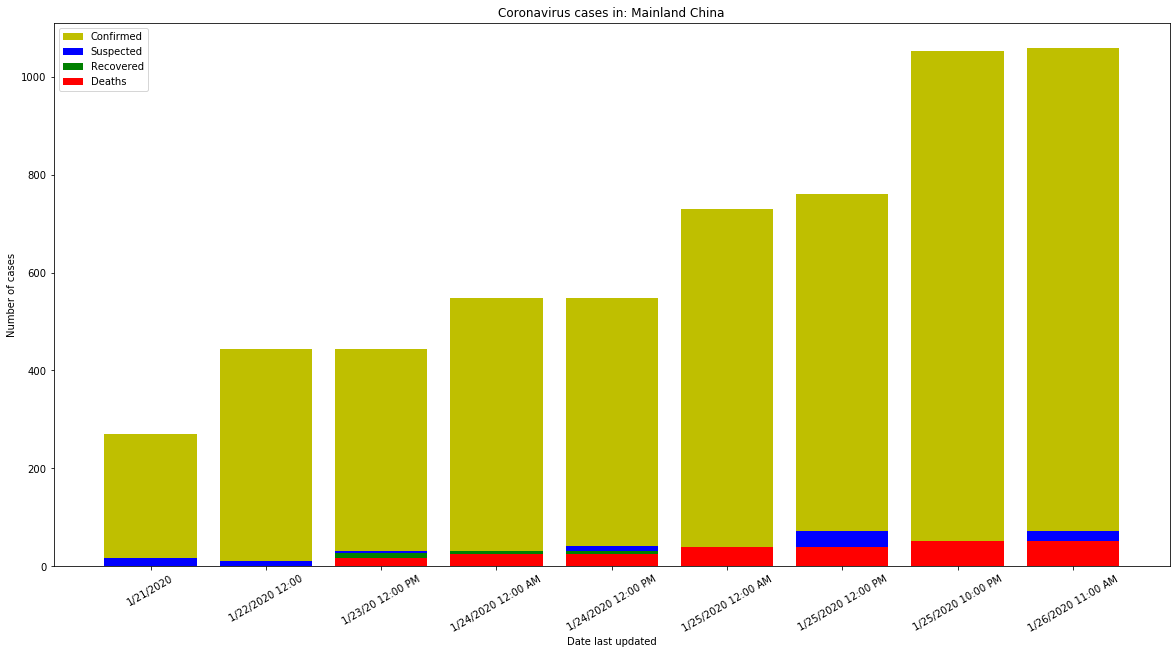

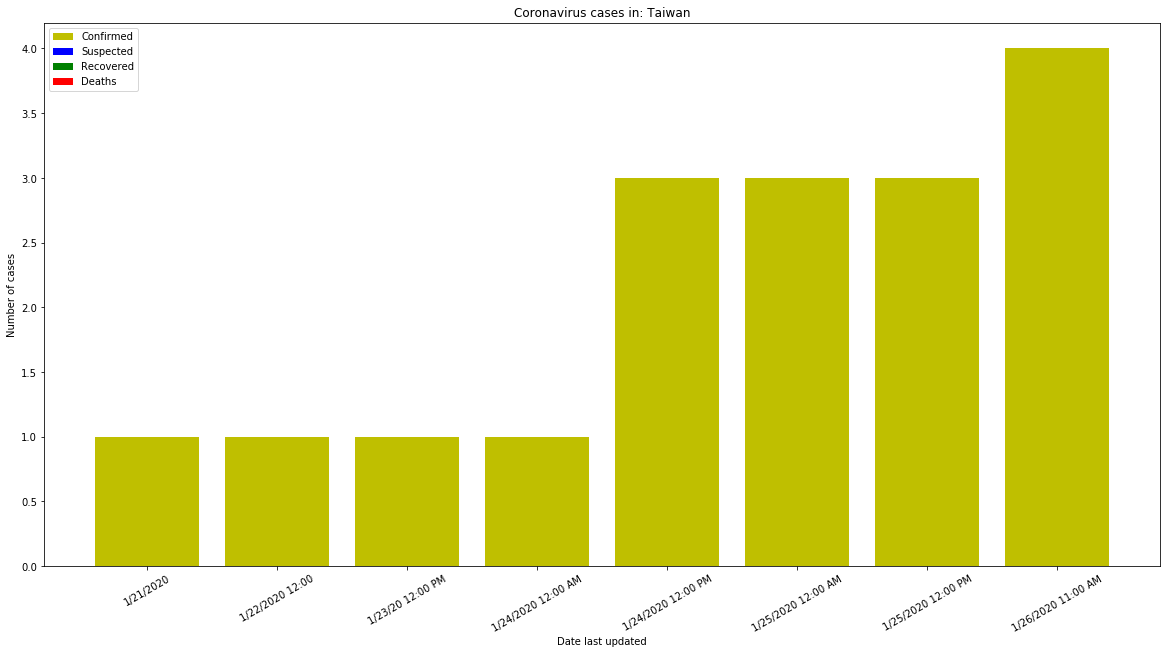

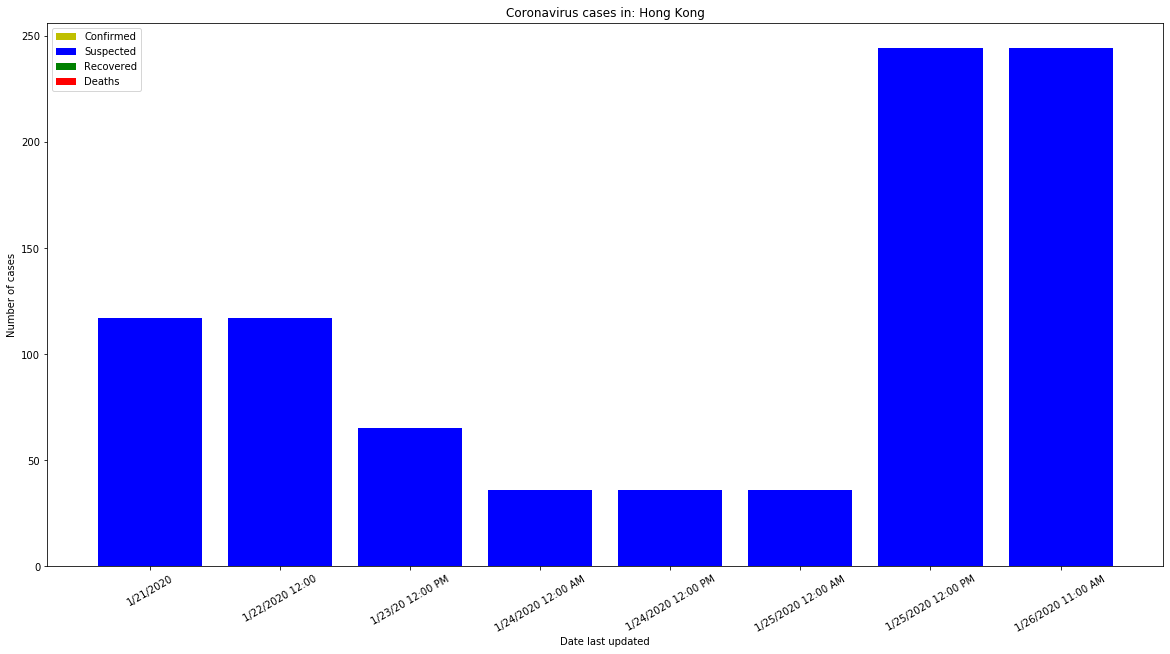

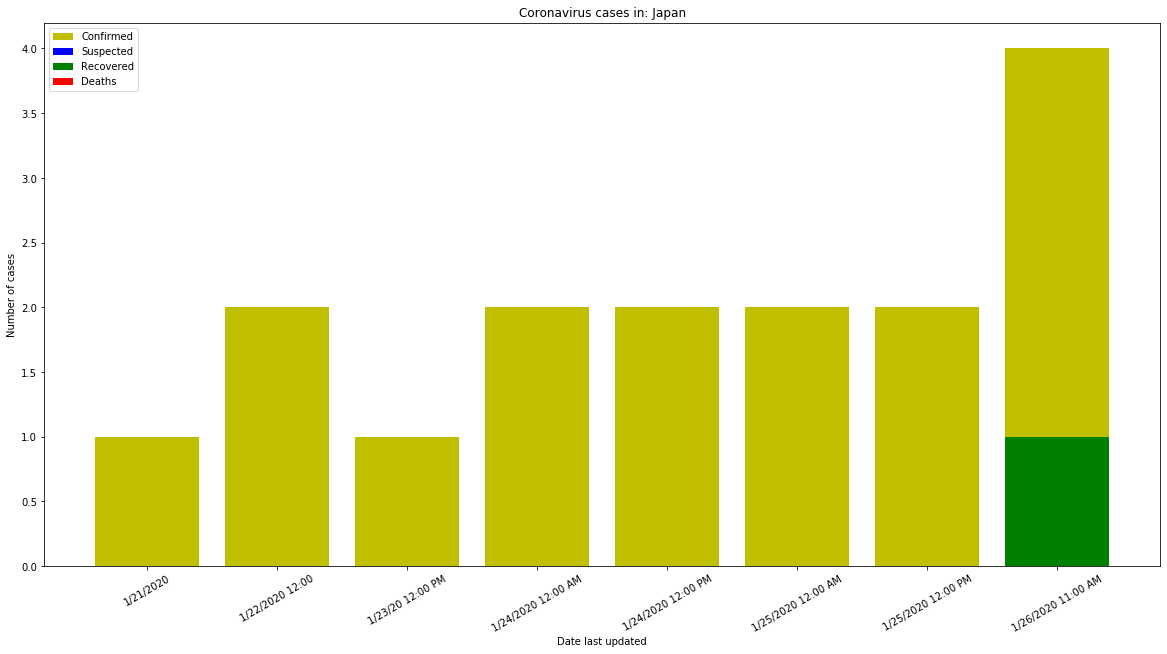

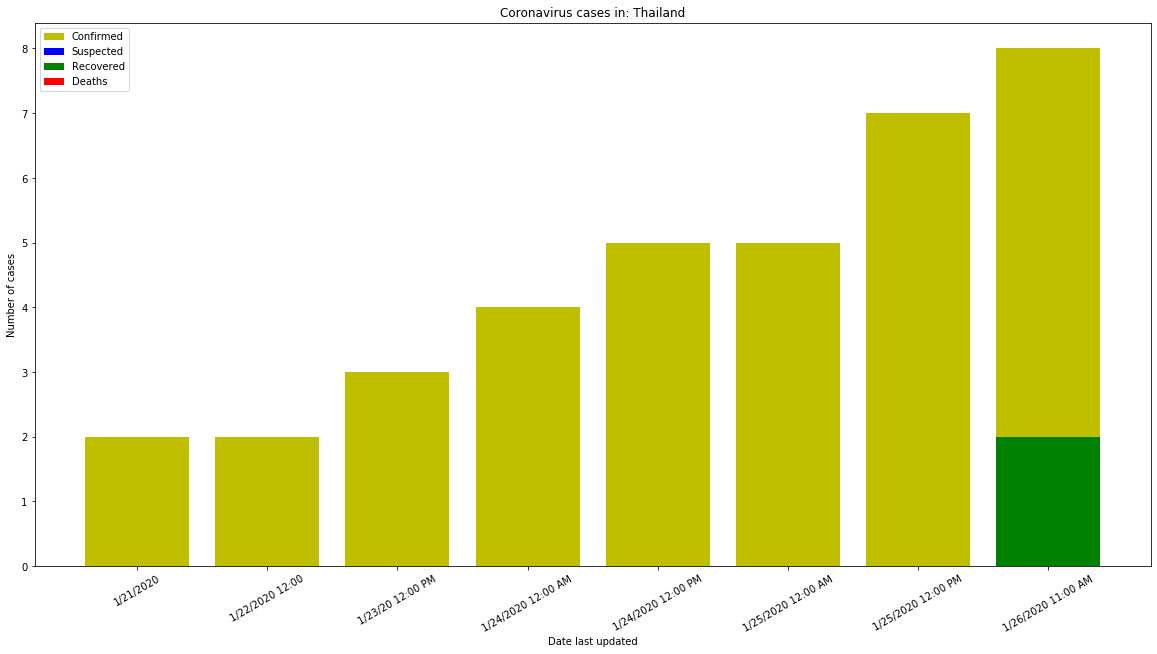

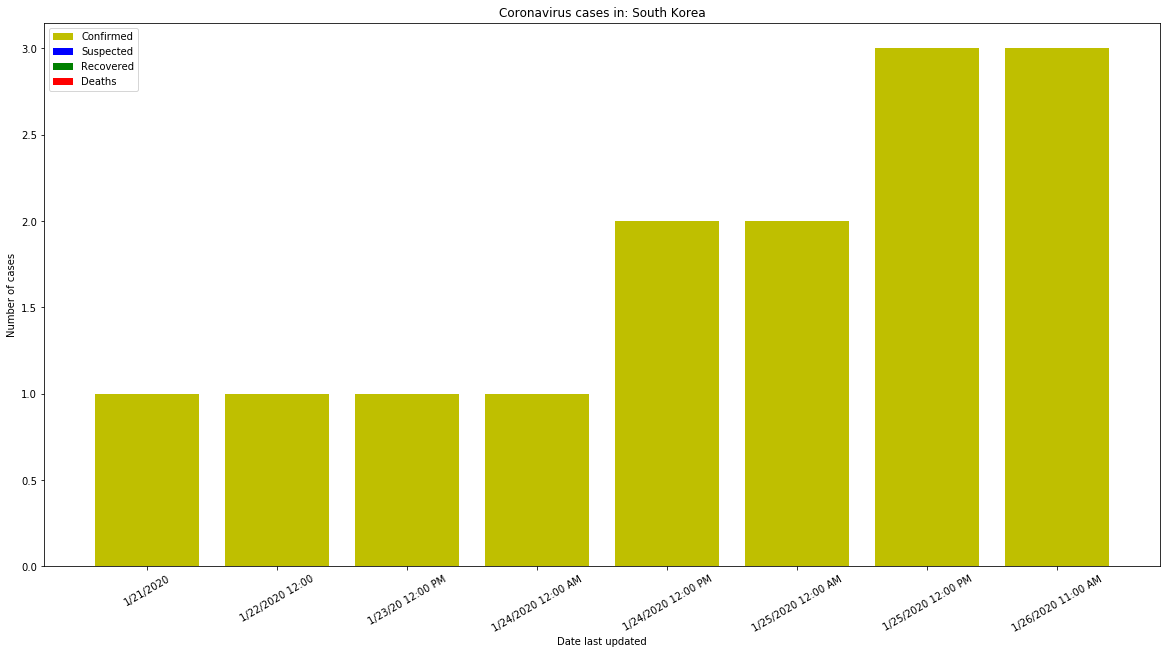

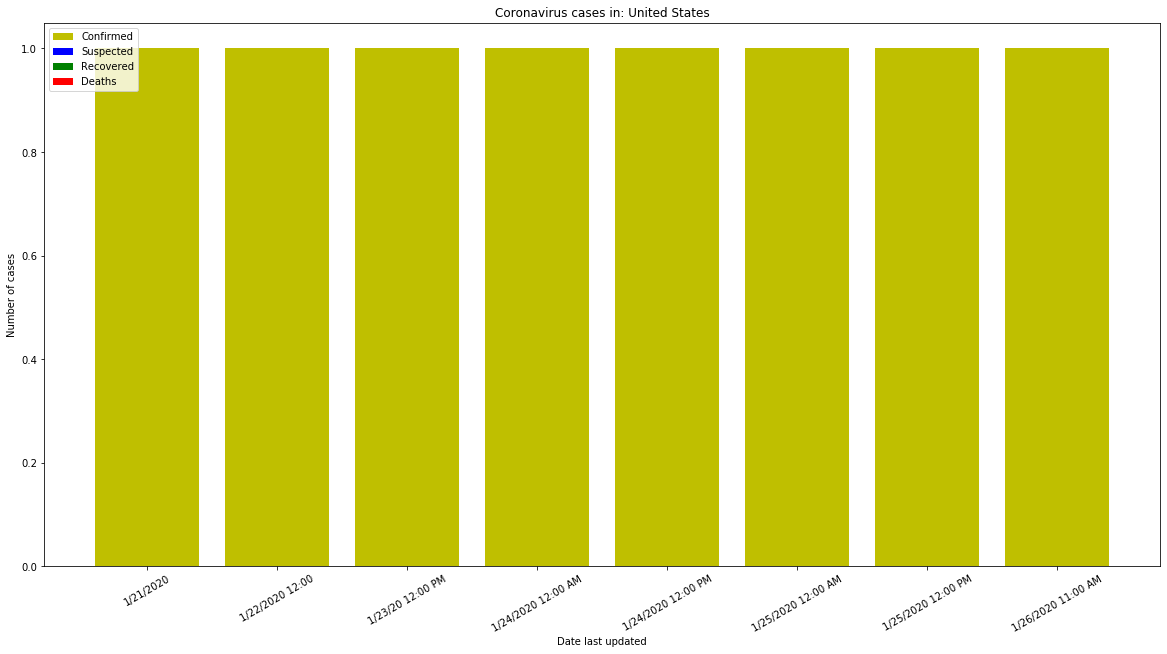

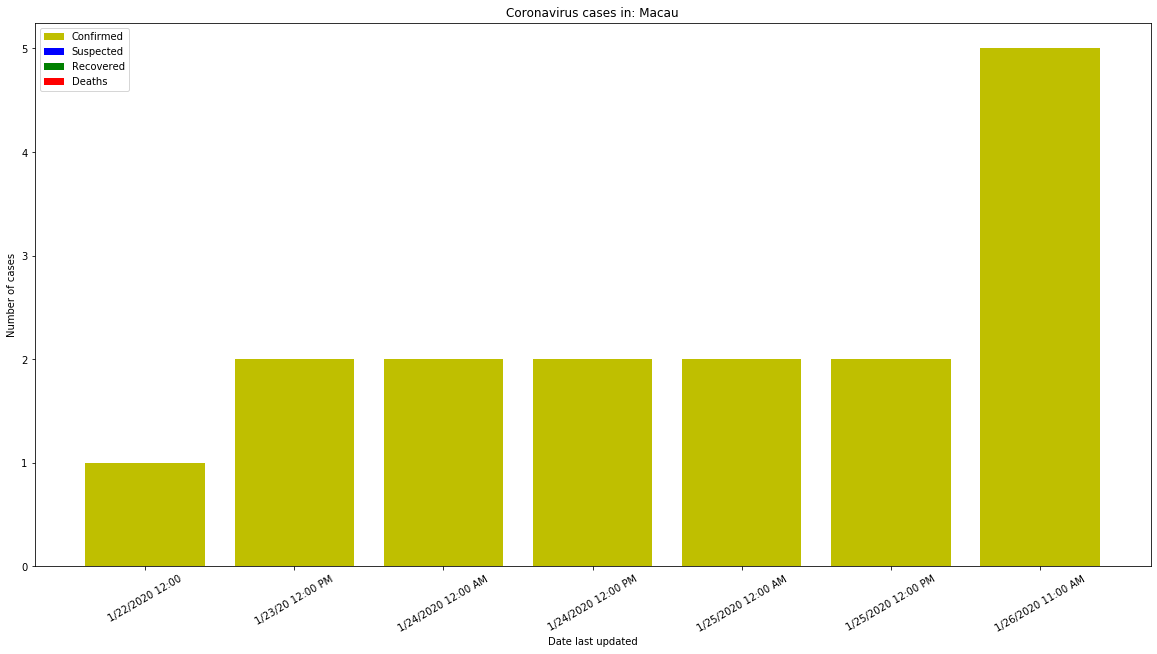

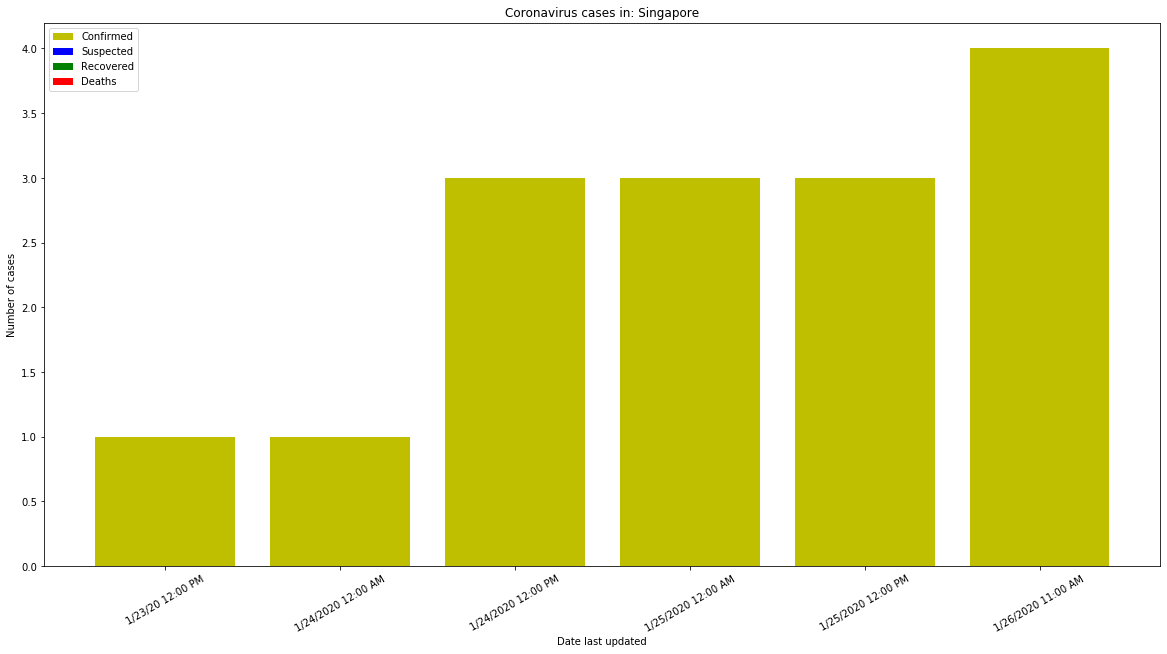

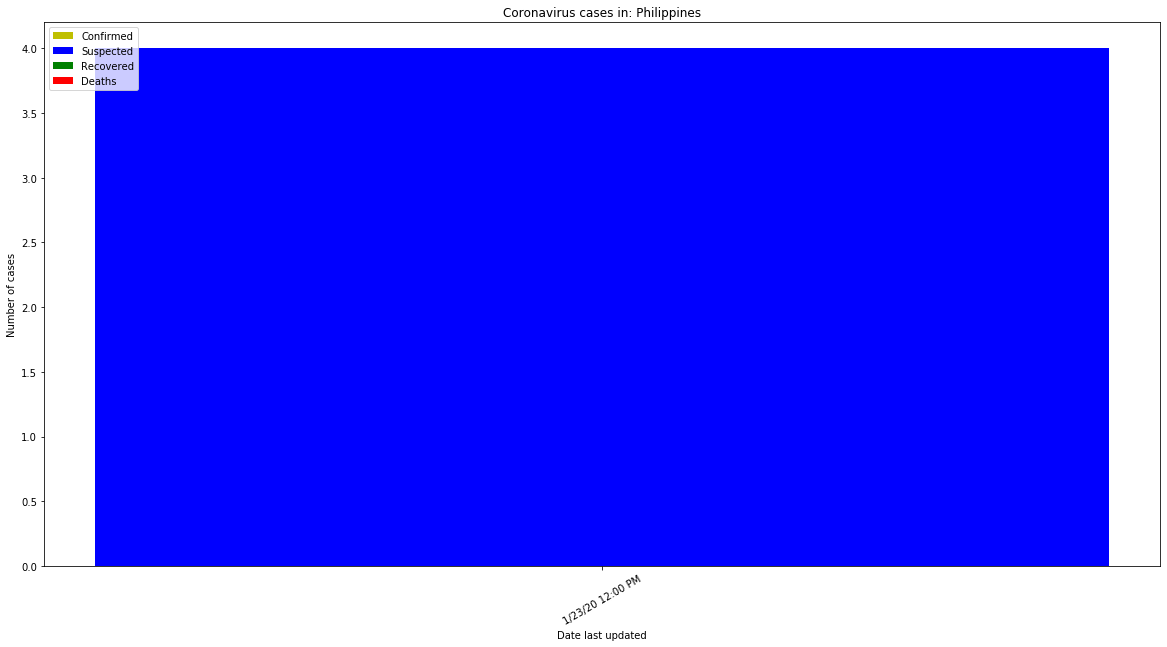

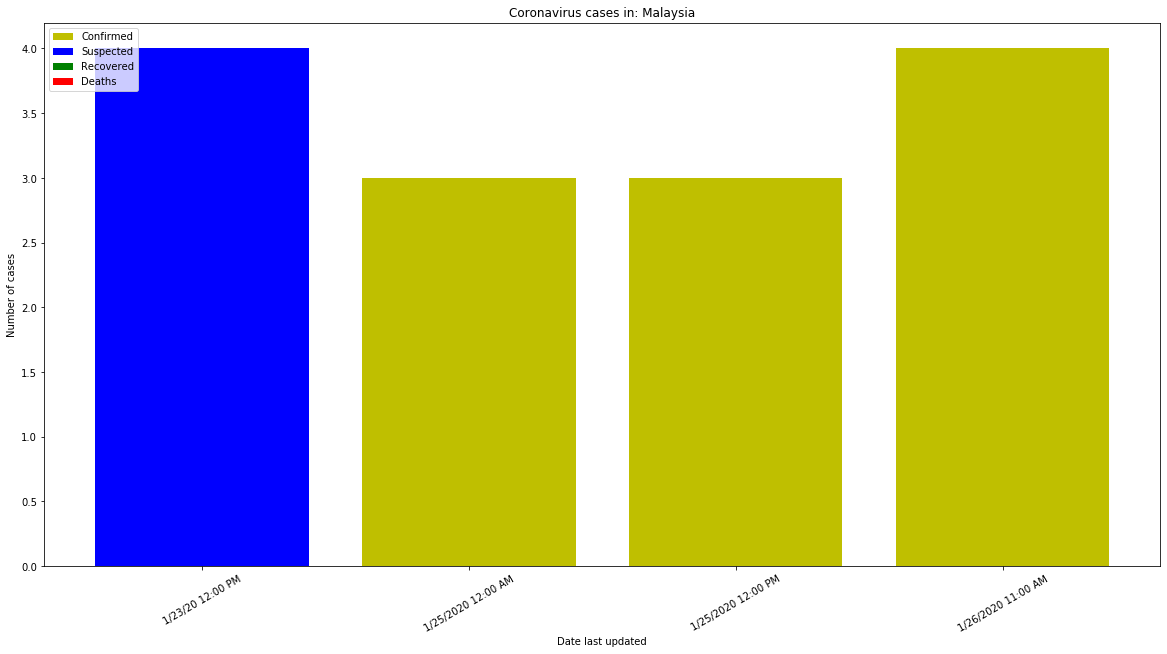

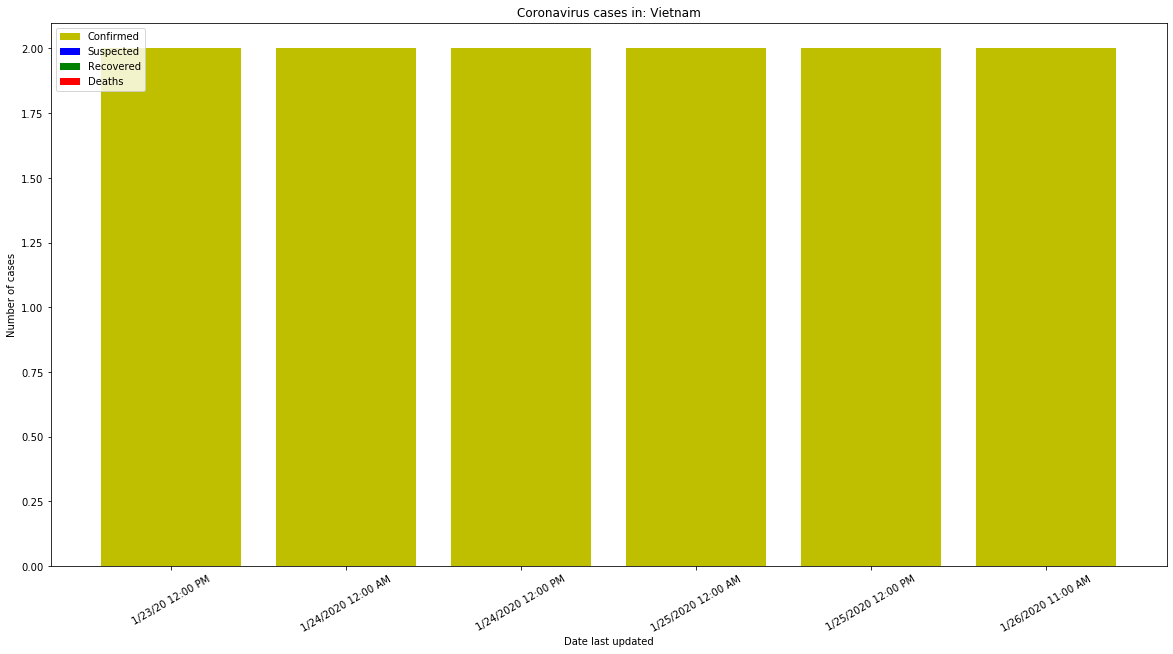

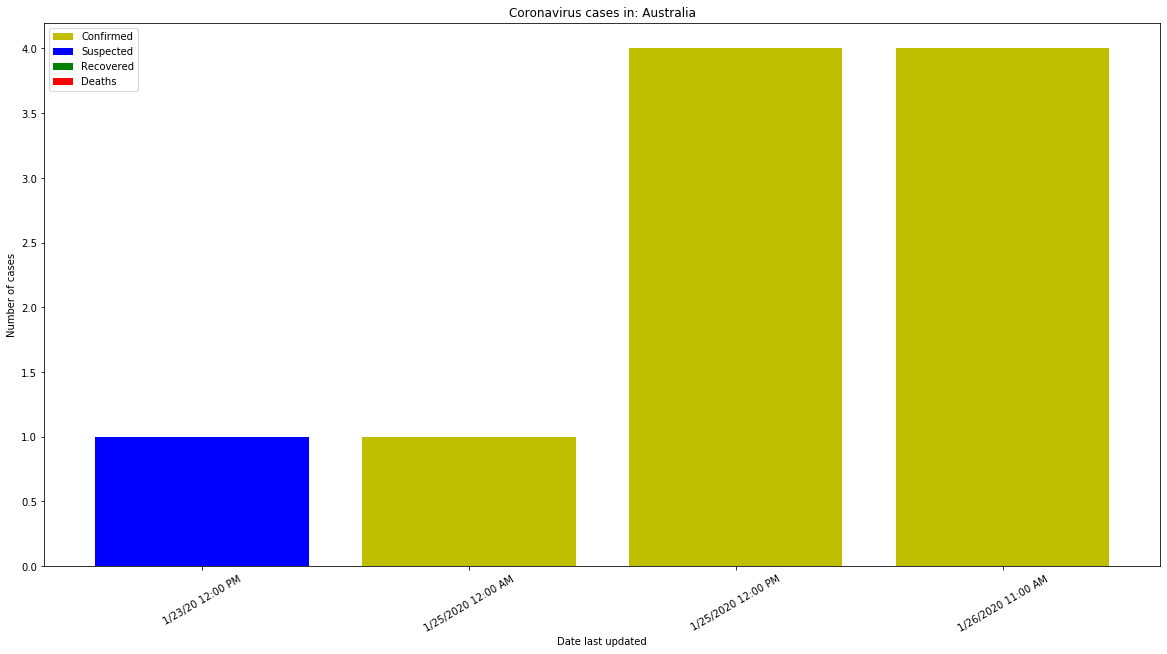

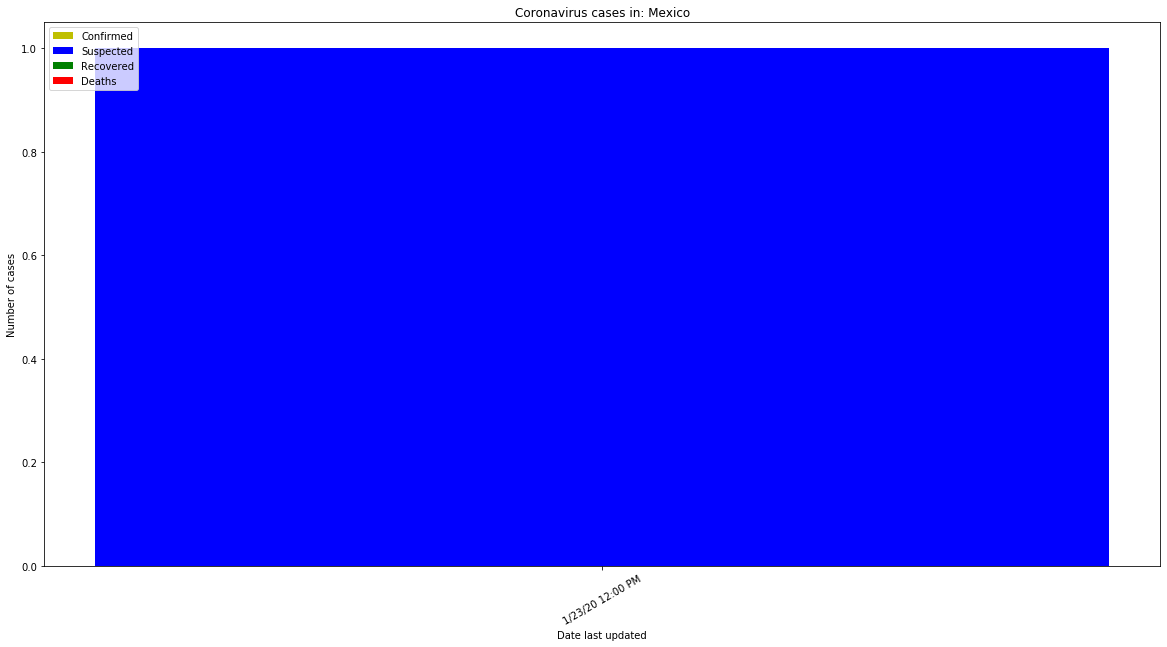

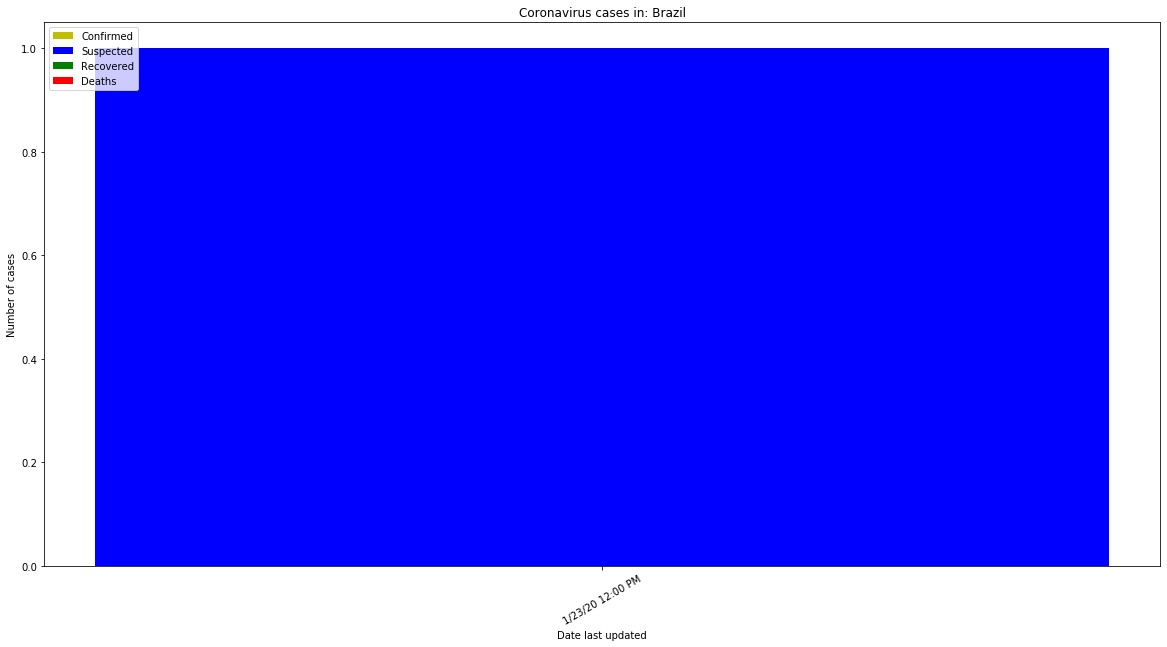

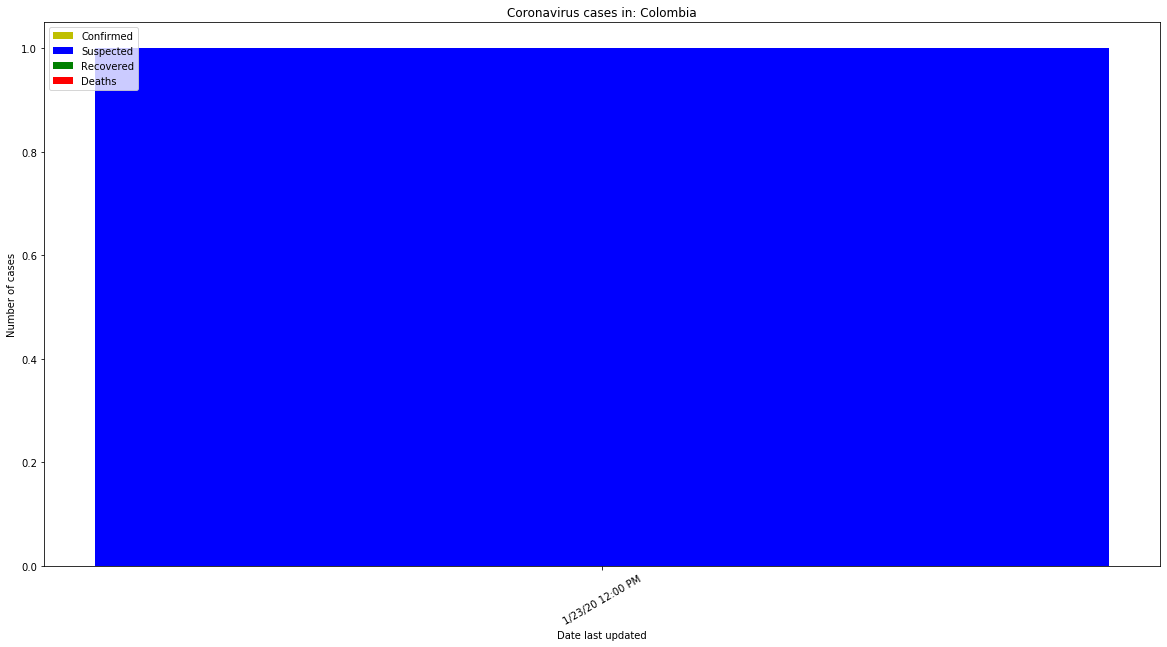

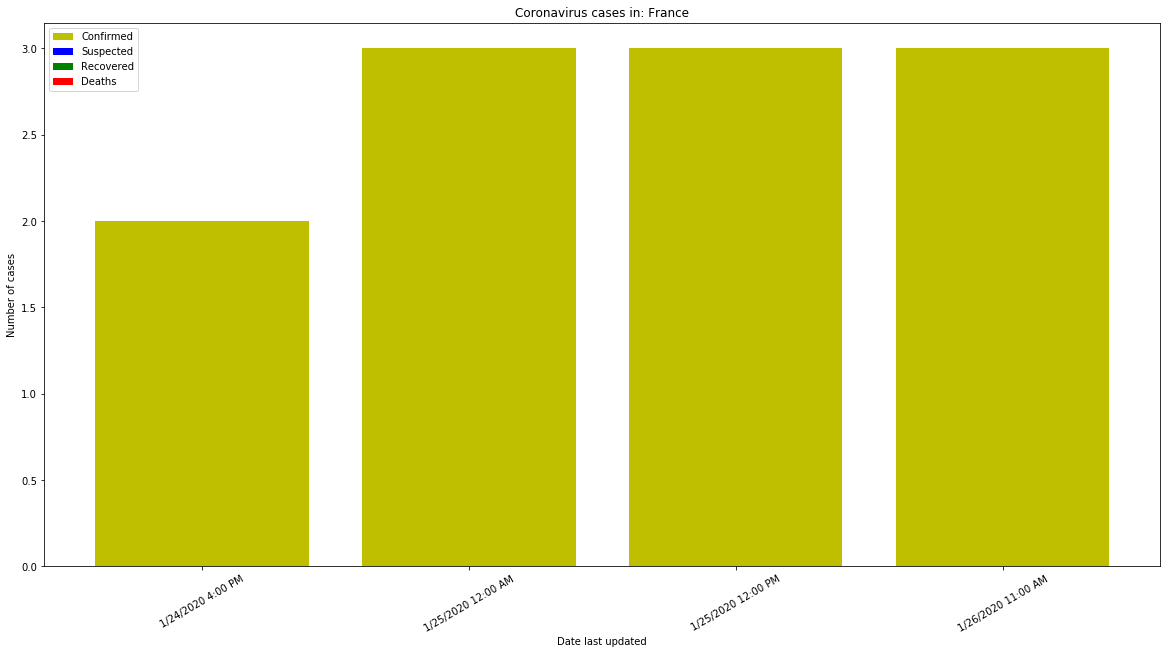

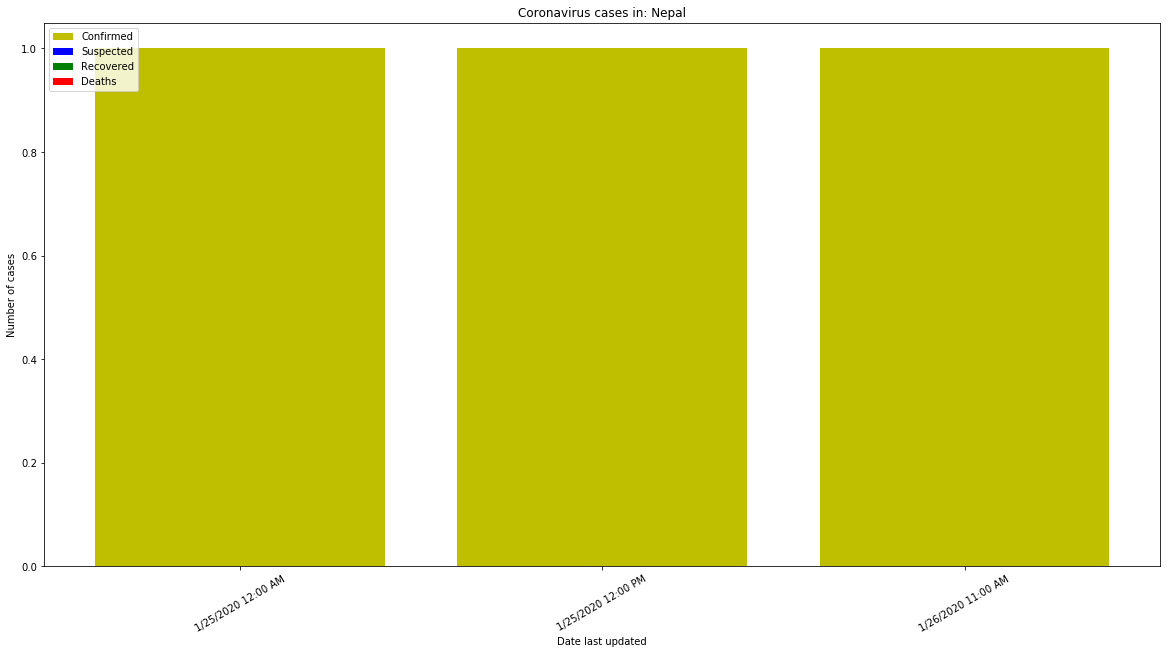

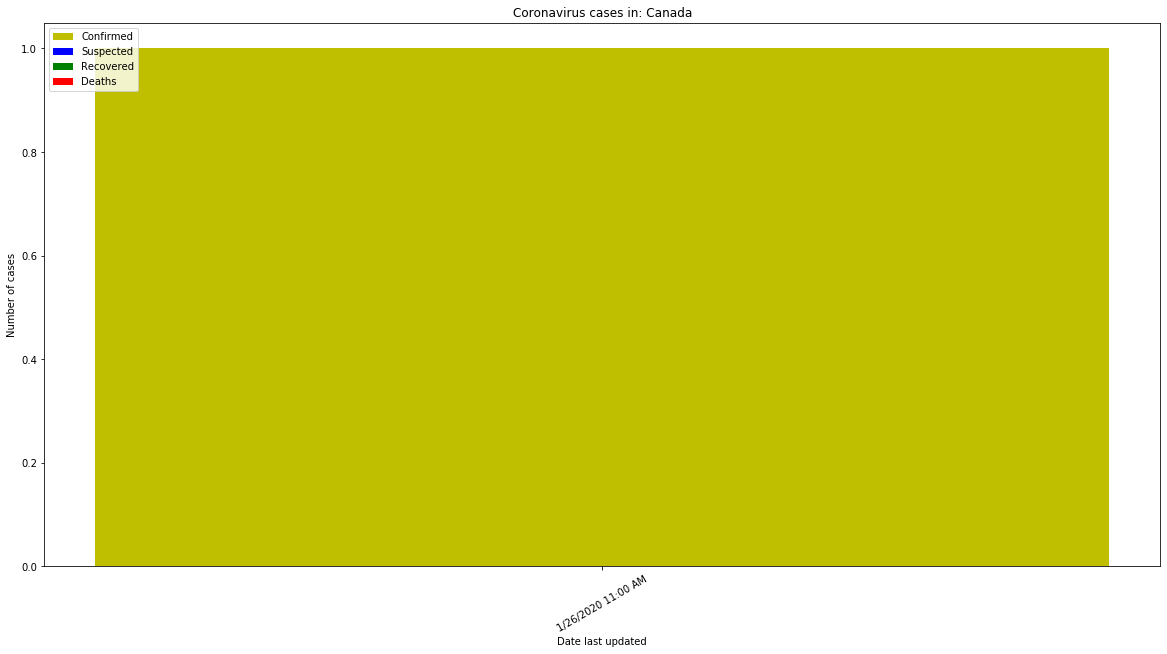

In [31]:
for x in df2["Country"].unique():
    temp_df=df2.loc[df2["Country"]==x]
    fig, ax = plt.subplots(figsize=(20,10))
    plt.bar(temp_df["Date last updated"],temp_df["Confirmed"],color='y')
    plt.bar(temp_df["Date last updated"],temp_df["Suspected"],color='b')
    plt.bar(temp_df["Date last updated"],temp_df["Recovered"],color='g')
    plt.bar(temp_df["Date last updated"],temp_df["Deaths"],color='r')
    plt.legend(["Confirmed","Suspected","Recovered", "Deaths"], loc="upper left")
    plt.xticks(fontsize=10, rotation=30)
    plt.xlabel("Date last updated")
    plt.ylabel("Number of cases")
    plt.title("Coronavirus cases in: "+x)